<h1><center>Superstore exploratory data analysis</center></h1>

# Table of Contents
### -  [Step 0: Imports and Reading Data](#step0)
### -  [Step 1: Data Understanding](#step1)
### -  [Step 2: Data Preparation](#step2)
### -  [Step 3: Feature Understanding](#step3)
### -  [Step 4: Feature Relationships](#step4)
### -  [Step 5: Conclusion and Insights](#step5)

# Step 0 : Imports and Reading data <a id='step0'></a>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Superstore.csv", encoding='windows-1252')


# Step 1: Data Understanding <a id='step1'></a>

In [3]:
df.shape

(9994, 21)

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [7]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Step 2: Data Preparation <a id='step2'></a>

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns.duplicated().sum()

0

In [10]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### Feature Creation

In [11]:
#feature creation (profit per unit)
df['profit per unit']=df['Quantity']/df['Profit']
# Calculate profit margin for each row
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

# Step 3: Feature Understanding <a id='step3'></a>

#### Numerical features

-  `Sales`
-  `Quantity`
-  `Discount`
-  `Profit`
-  `profit per unit`

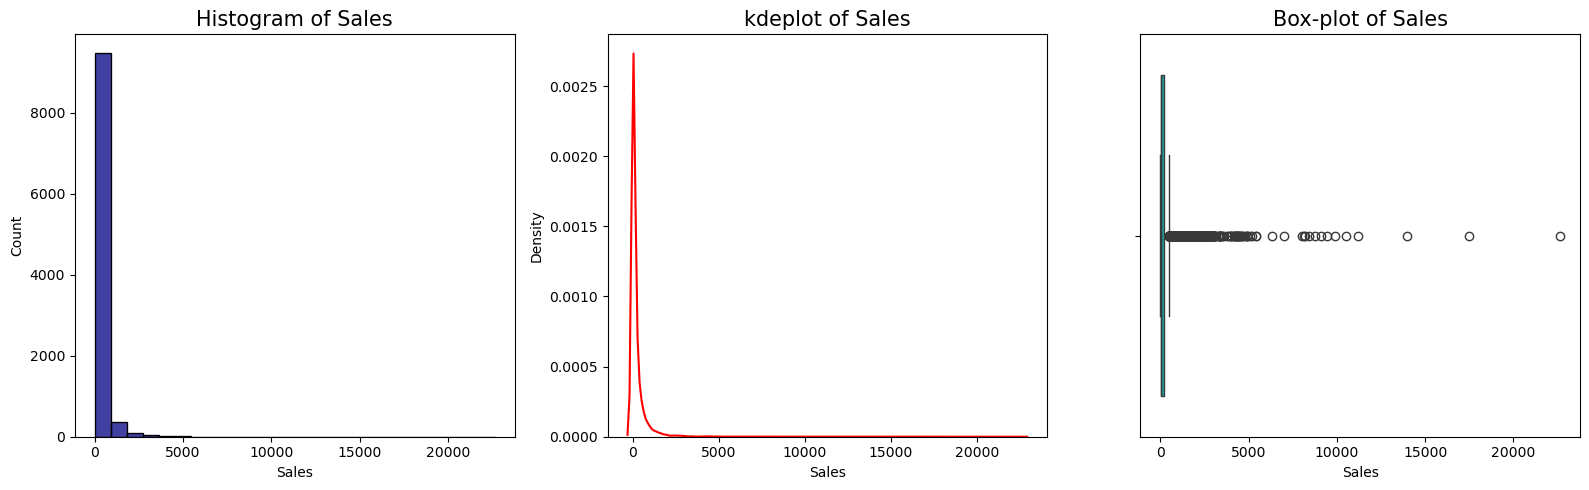

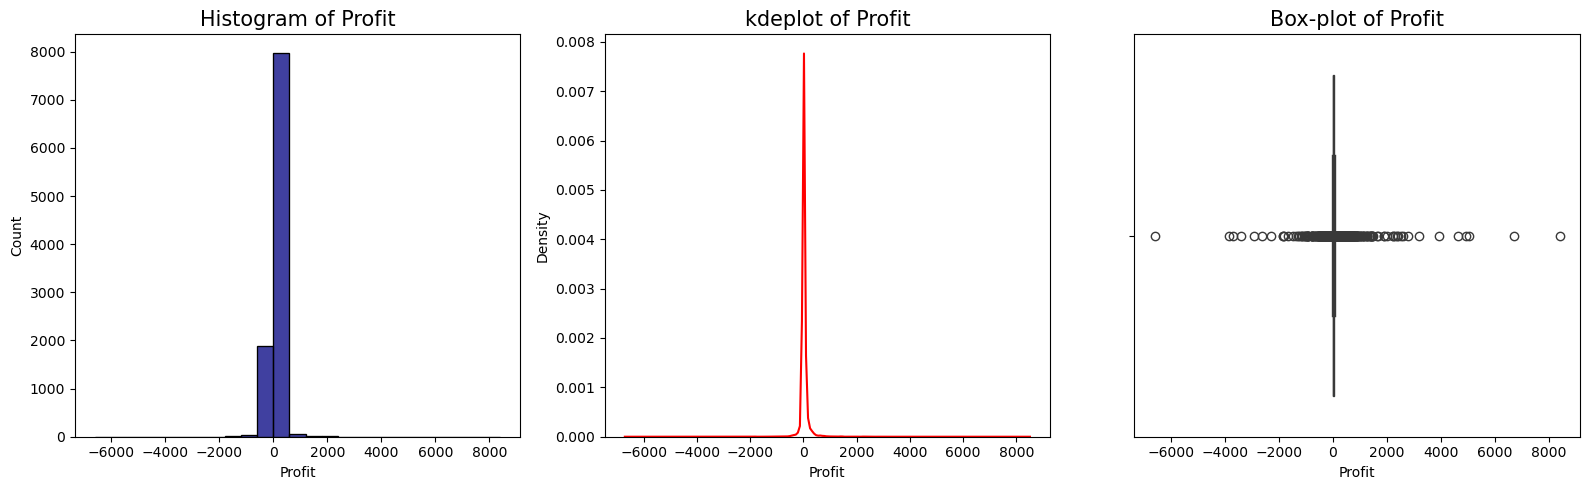

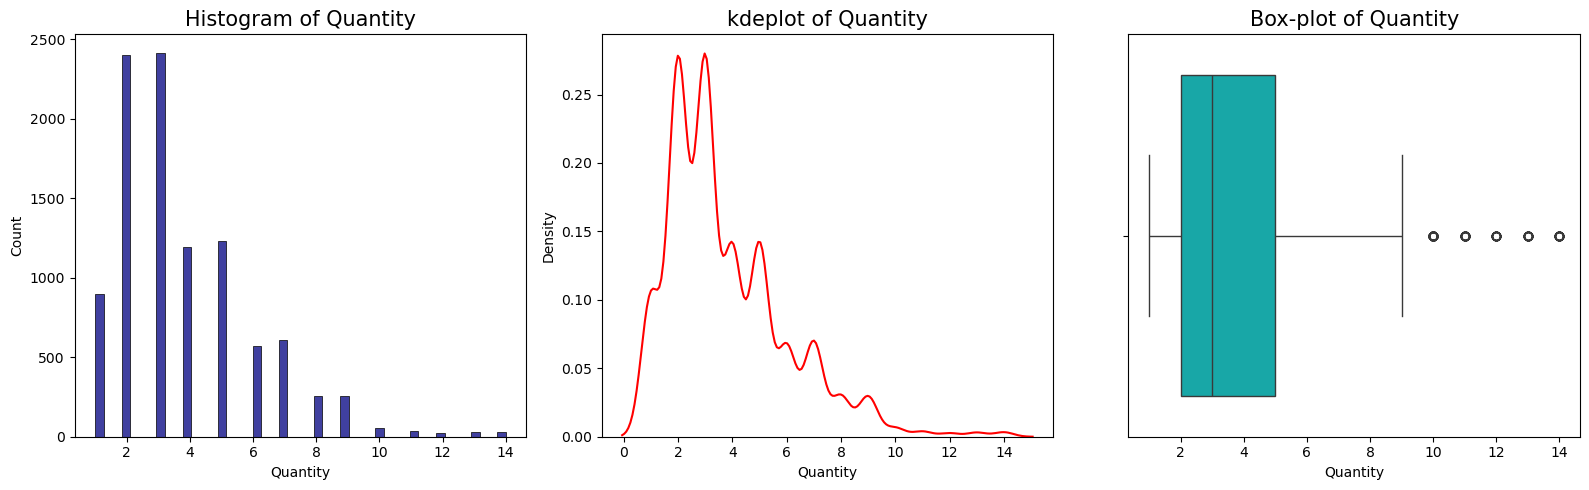

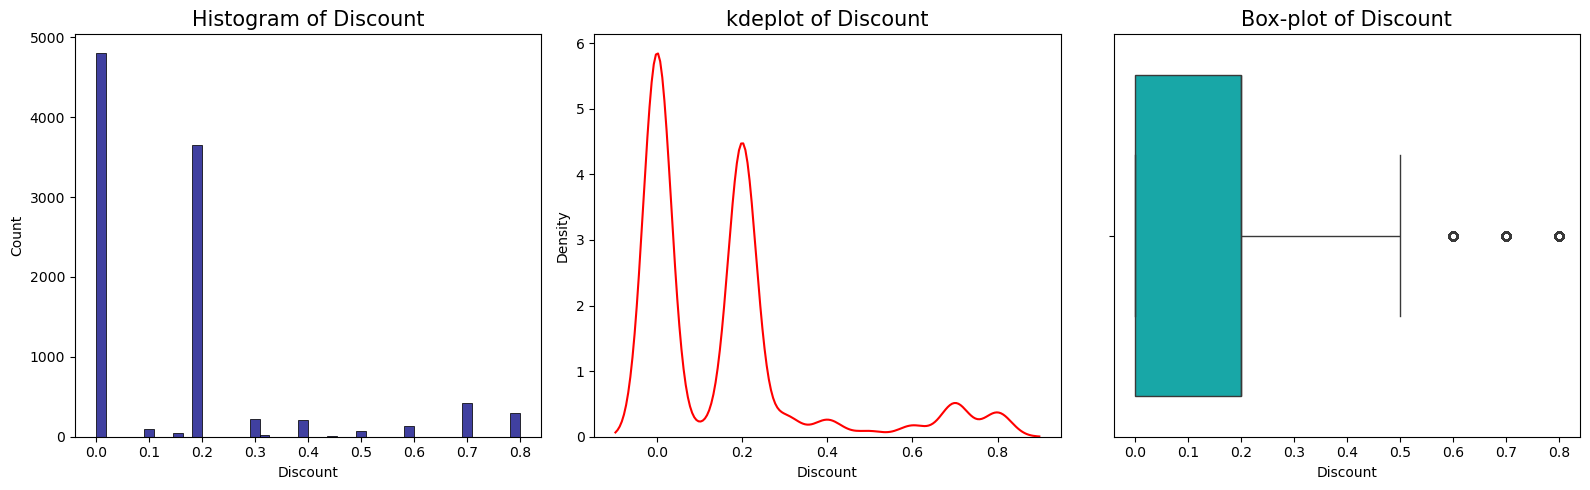

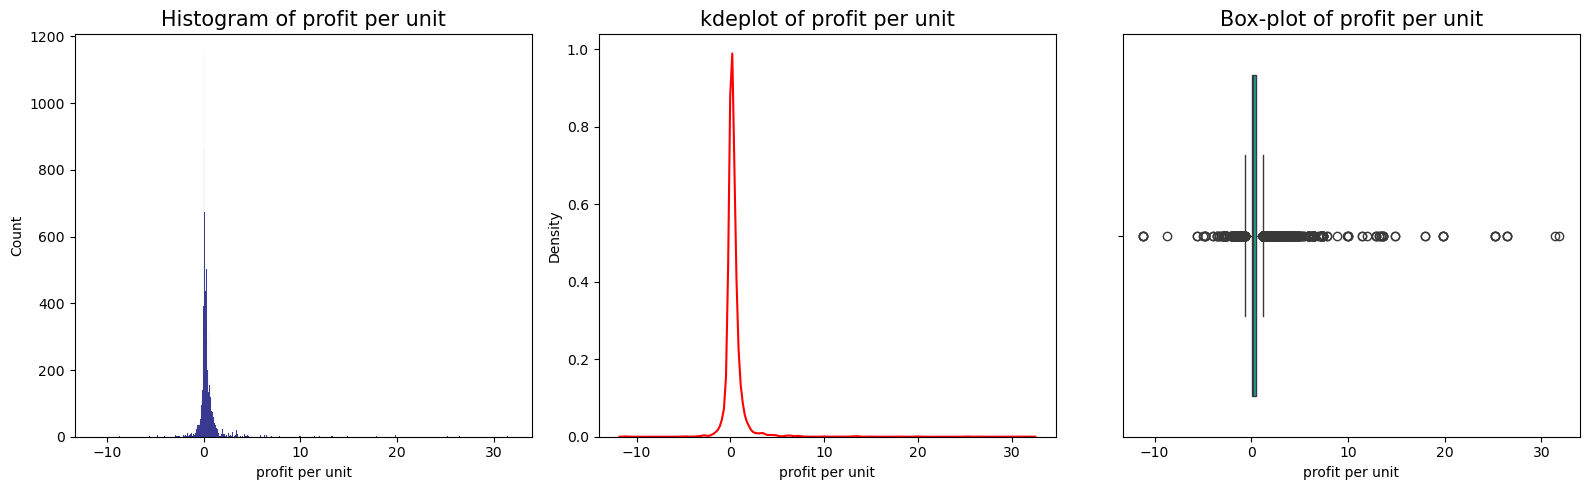

In [12]:
features= ['Sales','Profit','Quantity','Discount','profit per unit']
for i,col in enumerate(features):
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.figure(figsize=(16,5))
    plt.subplot(131)
    sns.histplot(data=df,x=col,bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)
    plt.subplot(132)
    sns.kdeplot(data=df,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)
    plt.subplot(133)
    sns.boxplot(data=df,x=col,color='c')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

#### Categorical features

- `Ship Mode`
- `Segment`
- `City`
- `State`
- `Region`
- `Category`
- `Sub-Category`
- `Product Name`

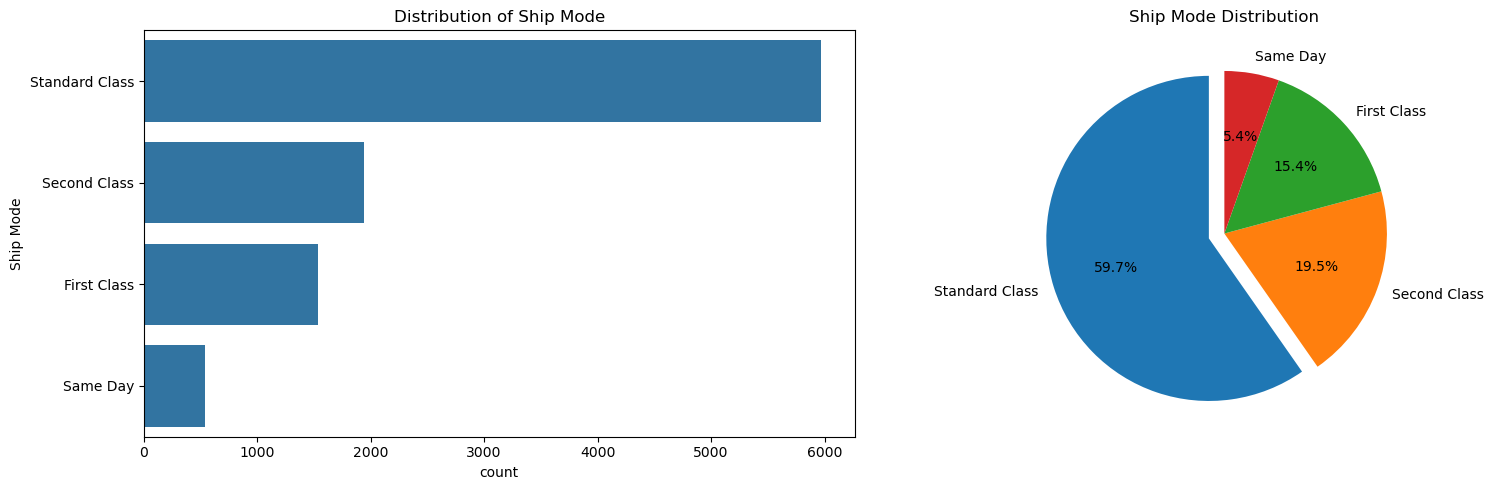

In [13]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
sns.countplot(y=df['Ship Mode'], order=df['Ship Mode'].value_counts().index)
plt.title("Distribution of Ship Mode")
plt.subplot(122)
ship_mode_counts = df['Ship Mode'].value_counts()
explode = [0.1] + [0] * (len(ship_mode_counts) - 1)
plt.pie(ship_mode_counts, labels=ship_mode_counts.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Ship Mode Distribution")
plt.tight_layout()
plt.show()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


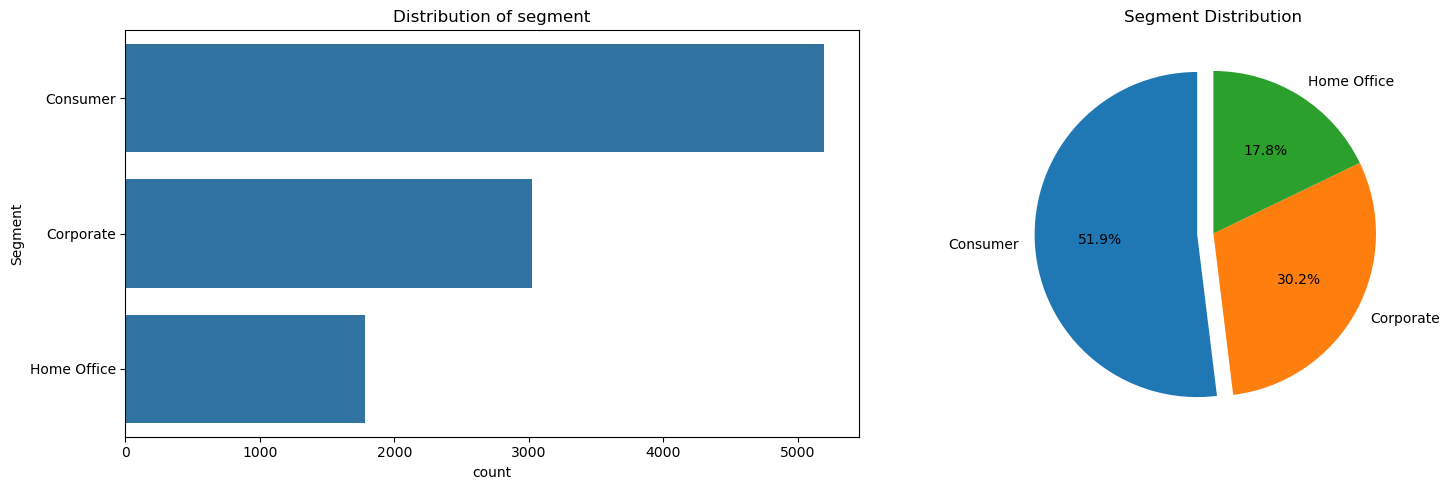

In [14]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
sns.countplot(y=df['Segment'], order=df['Segment'].value_counts().index)
plt.title("Distribution of segment")
plt.subplot(122)
Segment_counts = df['Segment'].value_counts()
explode = [0.1] + [0] * (len(Segment_counts) - 1)
print(Segment_counts)
plt.pie(Segment_counts, labels=Segment_counts.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Segment Distribution")
plt.tight_layout()
plt.show()

In [15]:
df['City'].nunique()

531

In [16]:
df['State'].nunique()

49

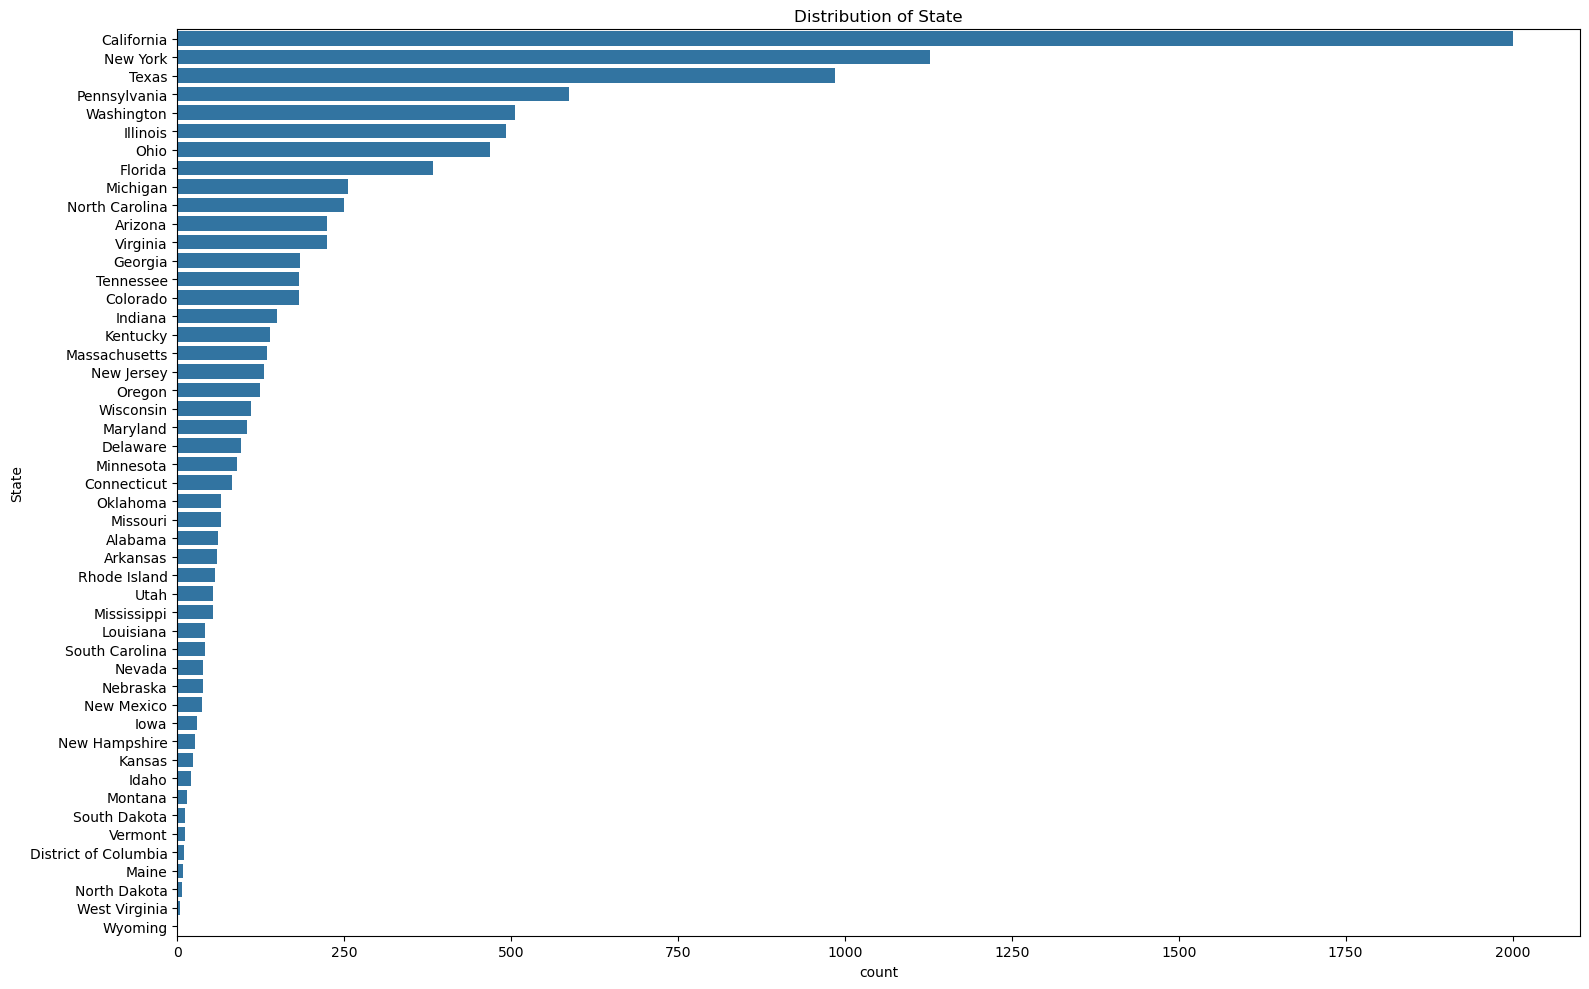

In [17]:
plt.figure(figsize=(16, 10))
sns.countplot(y=df['State'], order=df['State'].value_counts().index)
plt.title("Distribution of State")
plt.tight_layout()
plt.show()

In [18]:
df['Region'].nunique()

4

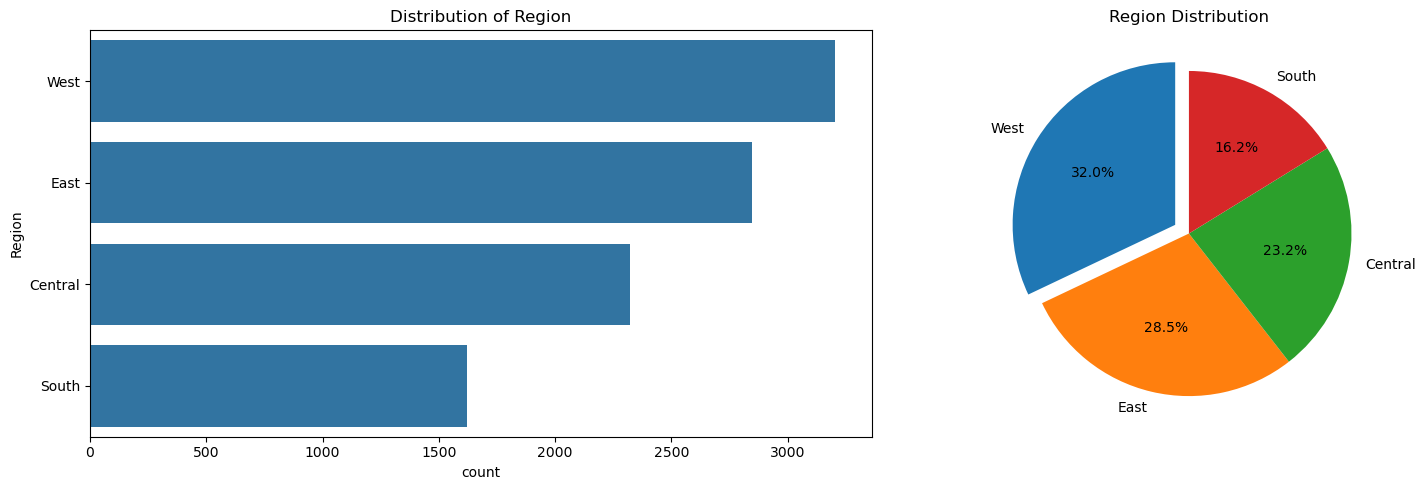

In [19]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
sns.countplot(y=df['Region'], order=df['Region'].value_counts().index)
plt.title("Distribution of Region")
plt.subplot(122)
Region_counts = df['Region'].value_counts()
explode = [0.1] + [0] * (len(Region_counts) - 1)
plt.pie(Region_counts, labels=Region_counts.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Region Distribution")
plt.tight_layout()
plt.show()

In [20]:
df['Category'].nunique()

3

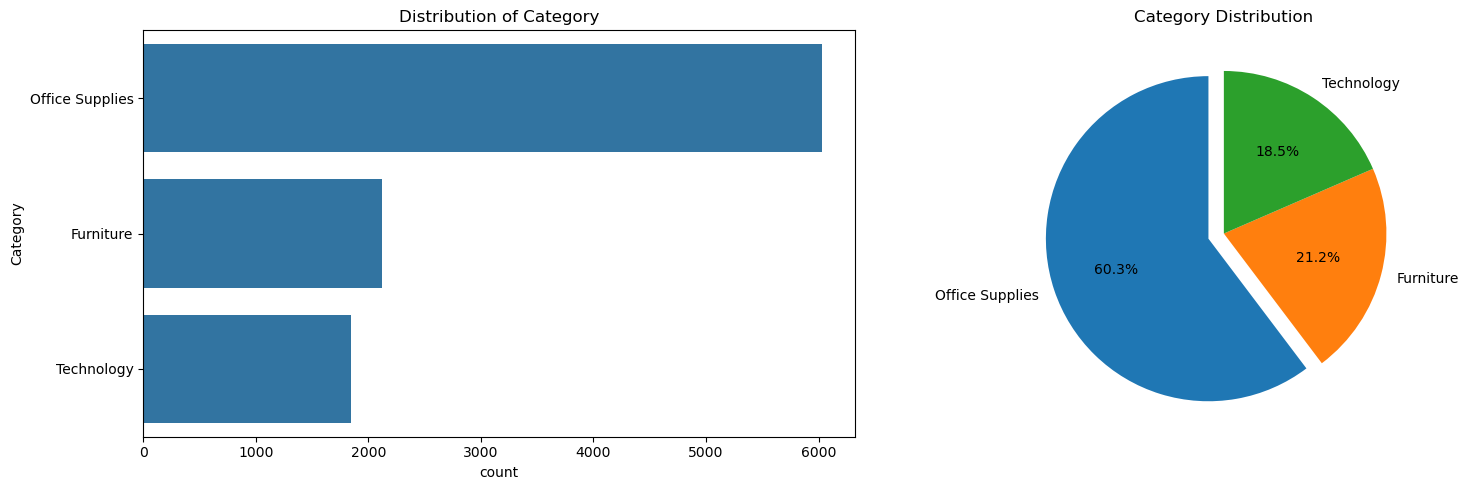

In [21]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index)
plt.title("Distribution of Category")
plt.subplot(122)
Category_counts = df['Category'].value_counts()
explode = [0.1] + [0] * (len(Category_counts) - 1)
plt.pie(Category_counts, labels=Category_counts.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title("Category Distribution")
plt.tight_layout()
plt.show()

In [22]:
df['Sub-Category'].nunique()

17

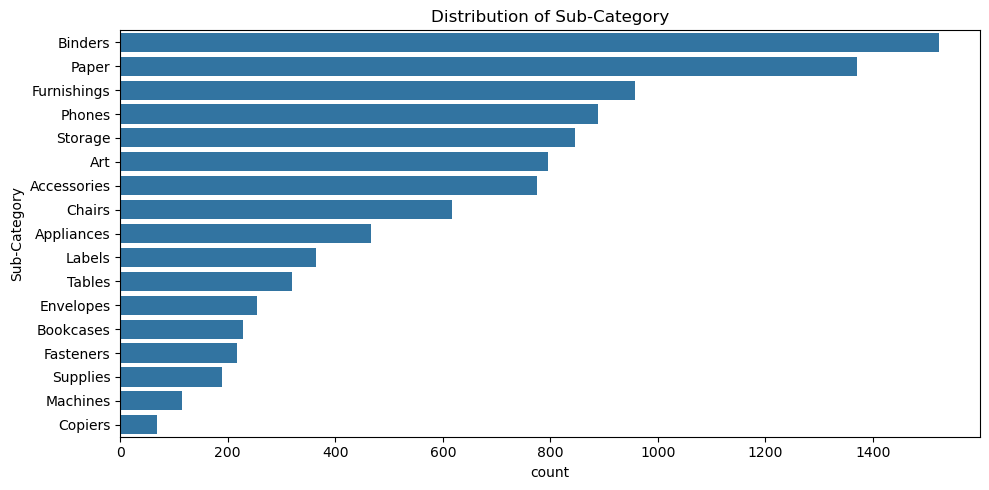

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Sub-Category'], order=df['Sub-Category'].value_counts().index)
plt.title("Distribution of Sub-Category")
plt.tight_layout()
plt.show()

In [24]:
df['Product Name'].nunique()

1850

# Step 4: Feature Relationships <a id='step4'></a>

##### 1. Numerical vs Numerical

(`Sales`  `Profit`)  VS `Order Date`

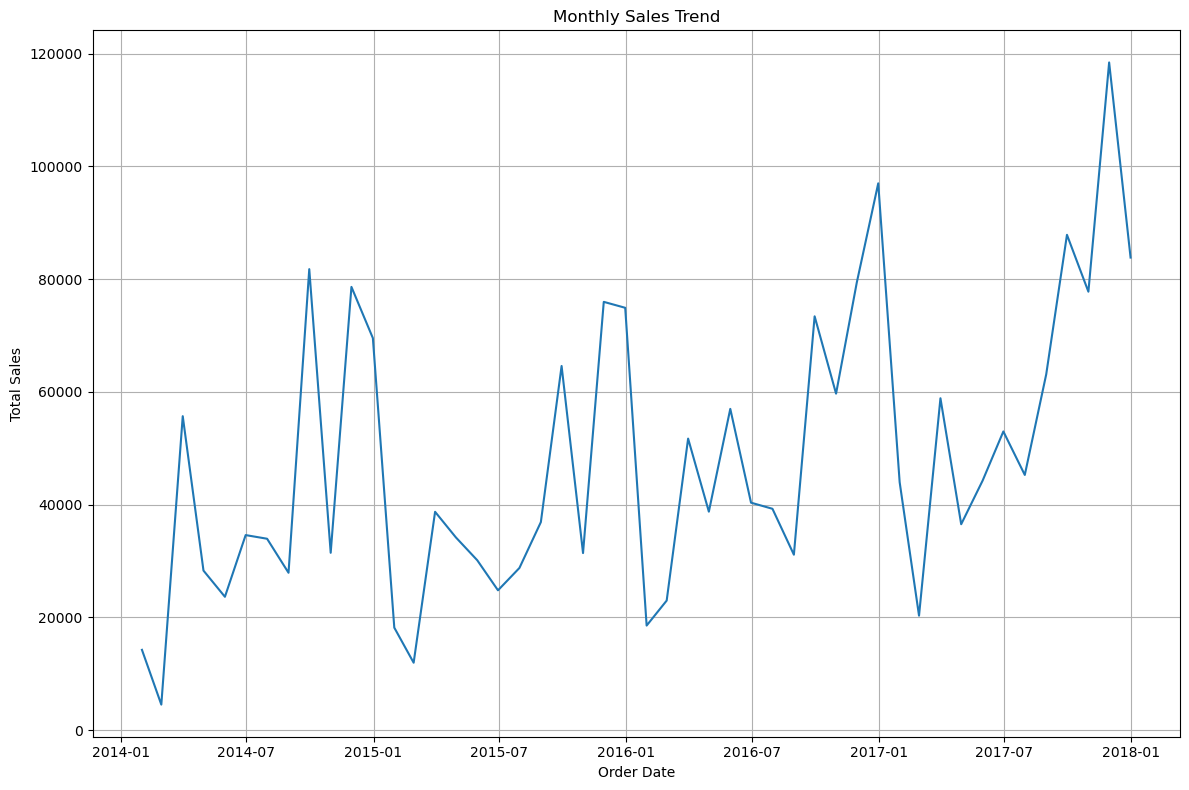

In [25]:

monthly_sales=df.groupby('Order Date')['Sales'].sum()
monthly_sales=monthly_sales.resample('M').sum()
plt.figure(figsize=(12, 8))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

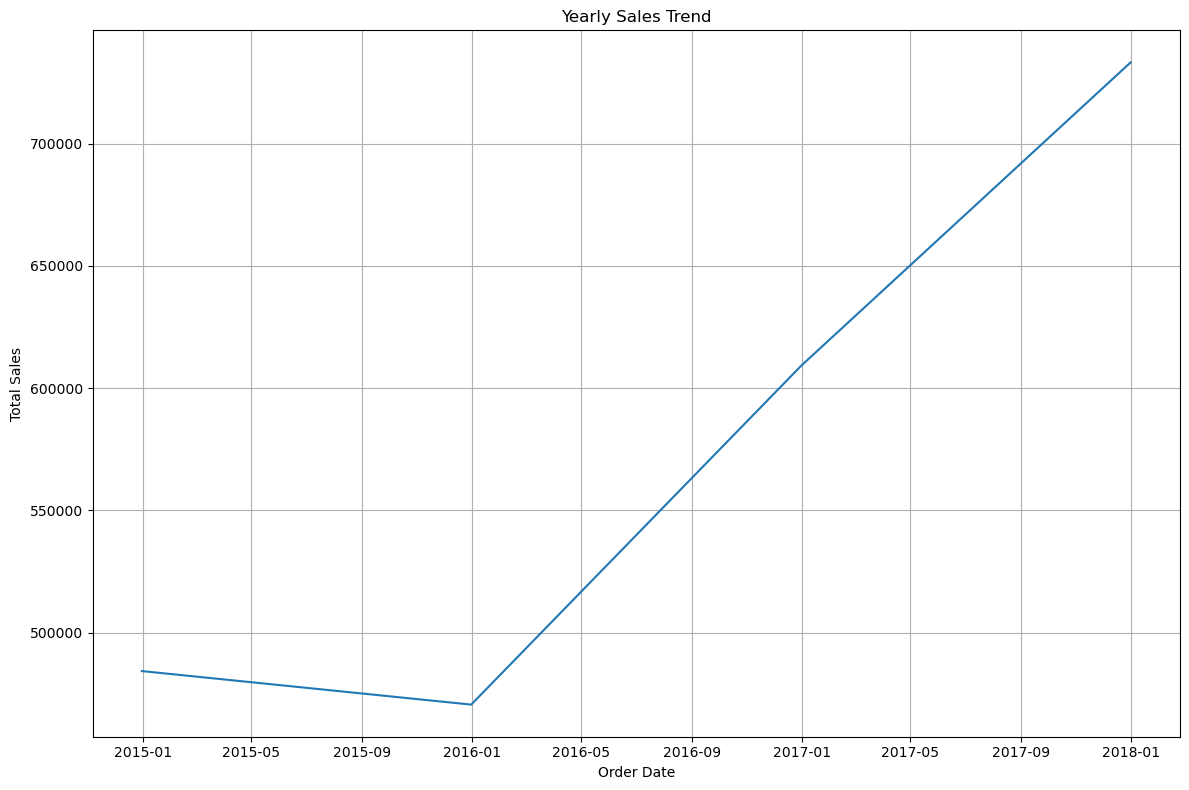

In [26]:
Yearly_sales=df.groupby('Order Date')['Sales'].sum()
Yearly_sales=Yearly_sales.resample('Y').sum()
plt.figure(figsize=(12, 8))
sns.lineplot(x=Yearly_sales.index, y=Yearly_sales.values)
plt.title('Yearly Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

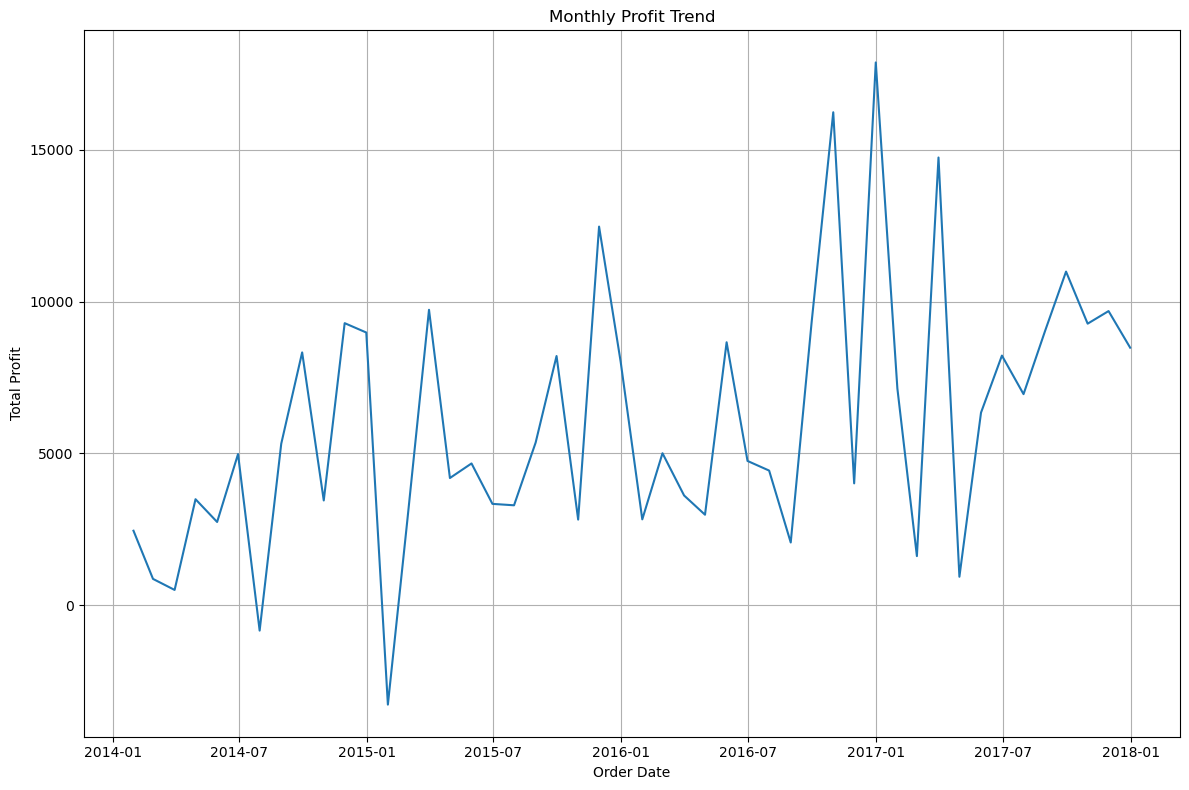

In [27]:
monthly_Profit=df.groupby('Order Date')['Profit'].sum()
monthly_Profit=monthly_Profit.resample('M').sum()
plt.figure(figsize=(12, 8))
sns.lineplot(x=monthly_Profit.index, y=monthly_Profit.values)
plt.title('Monthly Profit Trend')
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

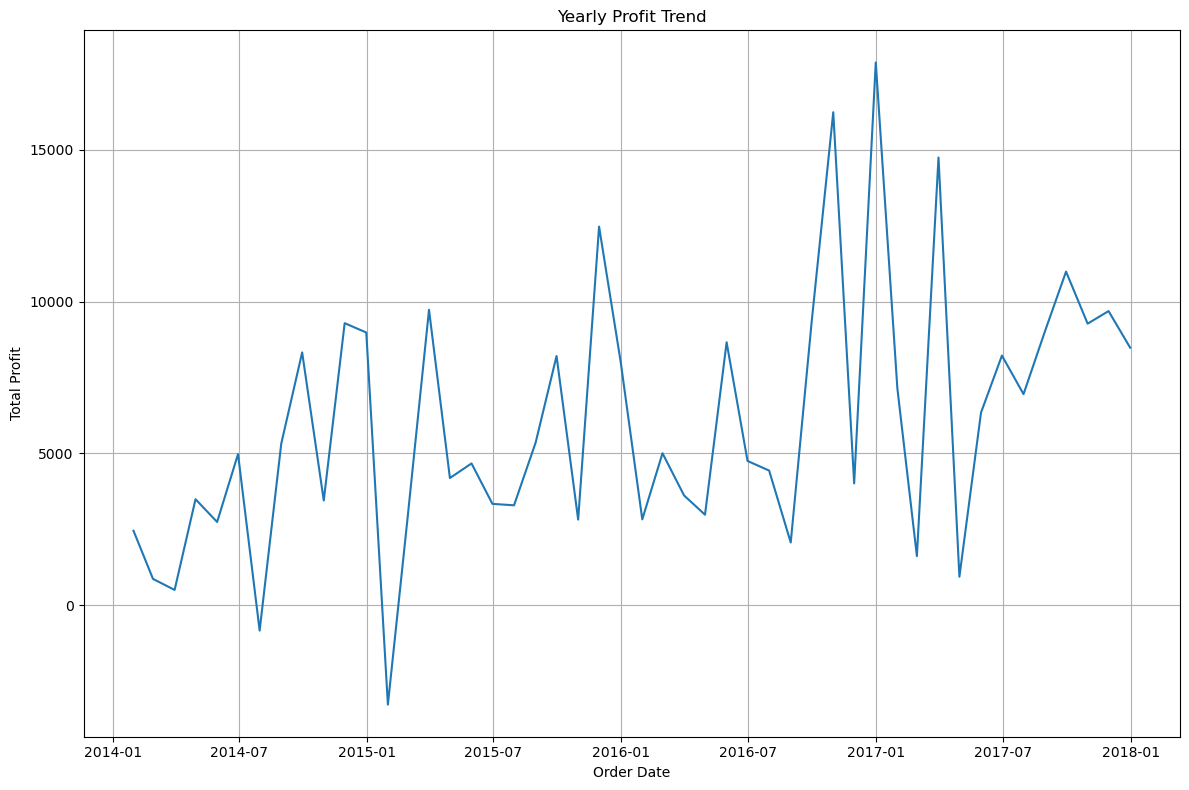

In [28]:
Yearly_Profit=df.groupby('Order Date')['Profit'].sum()
Yearly_Profit=Yearly_Profit.resample('M').sum()
plt.figure(figsize=(12, 8))
sns.lineplot(x=Yearly_Profit.index, y=Yearly_Profit.values)
plt.title('Yearly Profit Trend')
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

### Average Sales and Profit With and Without Discounts

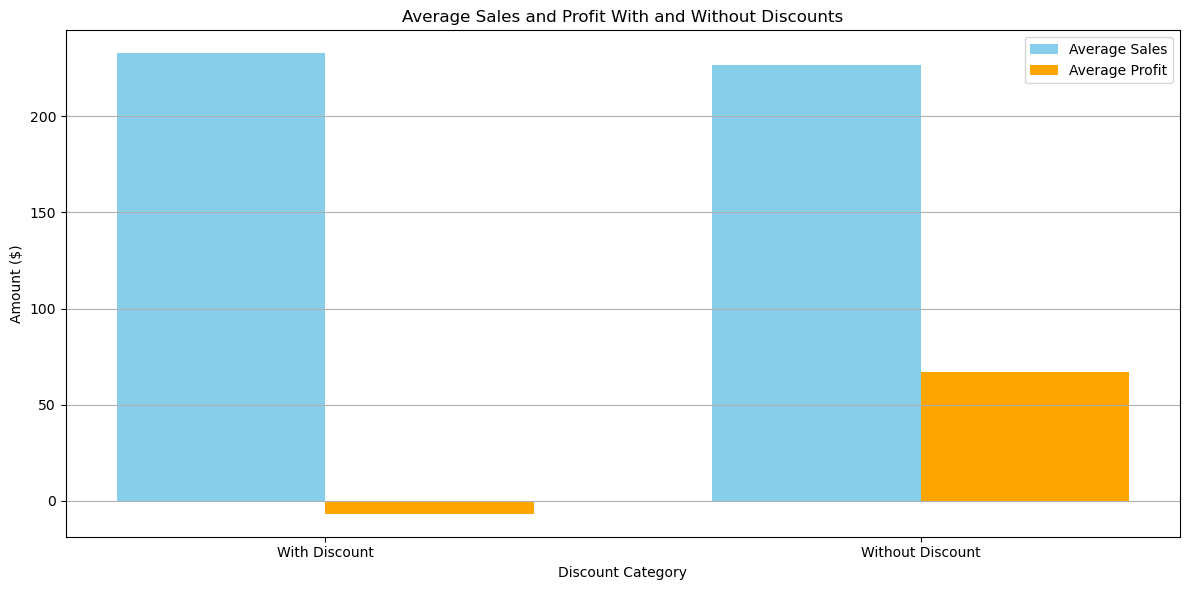

In [29]:

avg_sales_with_discount = df[df['Discount'] > 0]['Sales'].mean()
avg_sales_without_discount = df[df['Discount'] == 0]['Sales'].mean()
avg_profit_with_discount = df[df['Discount'] > 0]['Profit'].mean()
avg_profit_without_discount = df[df['Discount'] == 0]['Profit'].mean()

# Create a DataFrame for visualization
data = {
    'Category': ['With Discount', 'Without Discount'],
    'Average Sales': [avg_sales_with_discount, avg_sales_without_discount],
    'Average Profit': [avg_profit_with_discount, avg_profit_without_discount]
}

avg_df = pd.DataFrame(data)

# Set the index to the 'Category' column
avg_df.set_index('Category', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35  # Width of the bars

# X locations for the groups
x = np.arange(len(avg_df))

# Plotting average sales and profit side by side
plt.bar(x - bar_width/2, avg_df['Average Sales'], width=bar_width, label='Average Sales', color='skyblue')
plt.bar(x + bar_width/2, avg_df['Average Profit'], width=bar_width, label='Average Profit', color='orange')

# Adding titles and labels
plt.title('Average Sales and Profit With and Without Discounts')
plt.xlabel('Discount Category')
plt.ylabel('Amount ($)')
plt.xticks(x, avg_df.index)
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


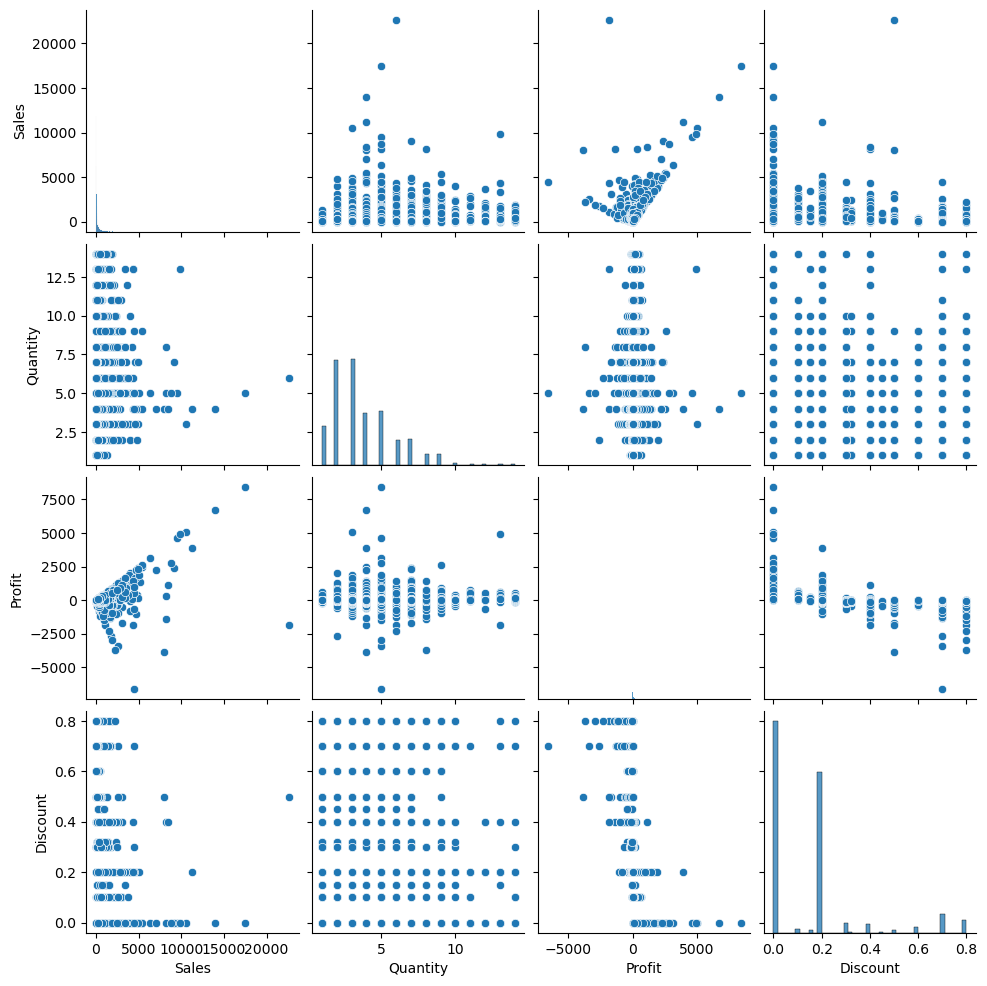

In [30]:
sns.pairplot(df[['Sales', 'Quantity', 'Profit', 'Discount']])
plt.show()

##### 2. Numerical VS Categorical 

#### Average Profit Margin by Product Category

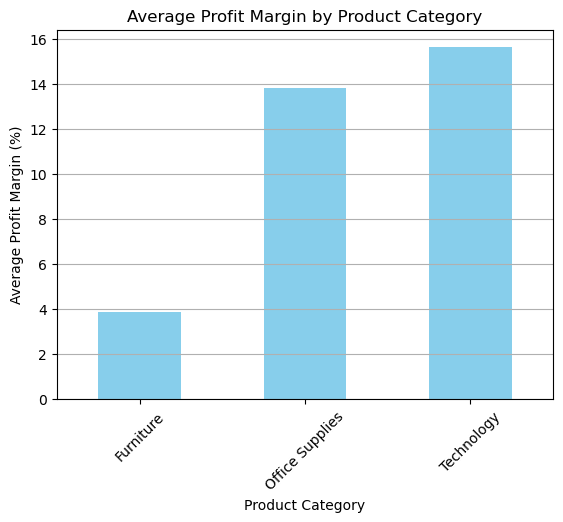

In [31]:

average_profit_margin = df.groupby('Category')['Profit Margin (%)'].mean()
average_profit_margin.plot(kind='bar', color='skyblue')
plt.title('Average Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Sales vs Discounts by Product Category

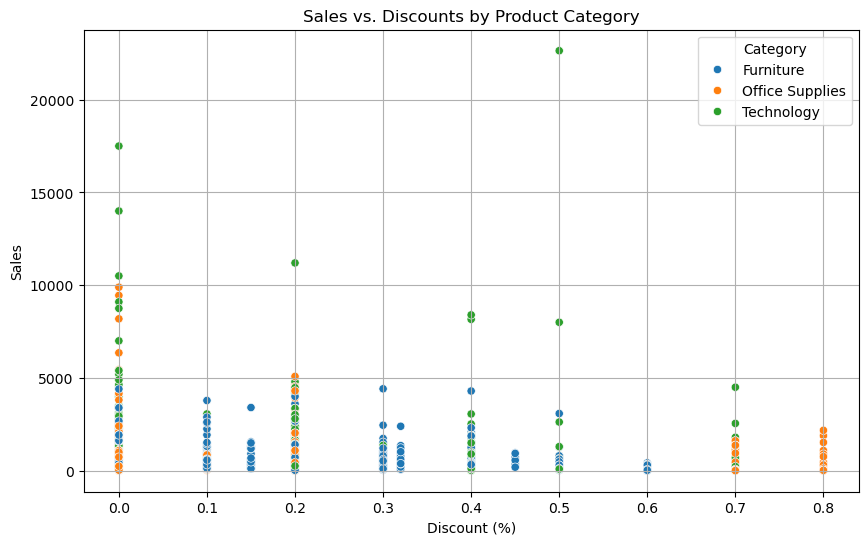

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Sales', hue='Category')
plt.title('Sales vs. Discounts by Product Category')
plt.xlabel('Discount (%)')
plt.ylabel('Sales')
plt.grid()
plt.show()

###### `Segment` vs  [ `Sales` , `Profit` , `Quantity` , `Discount` ]

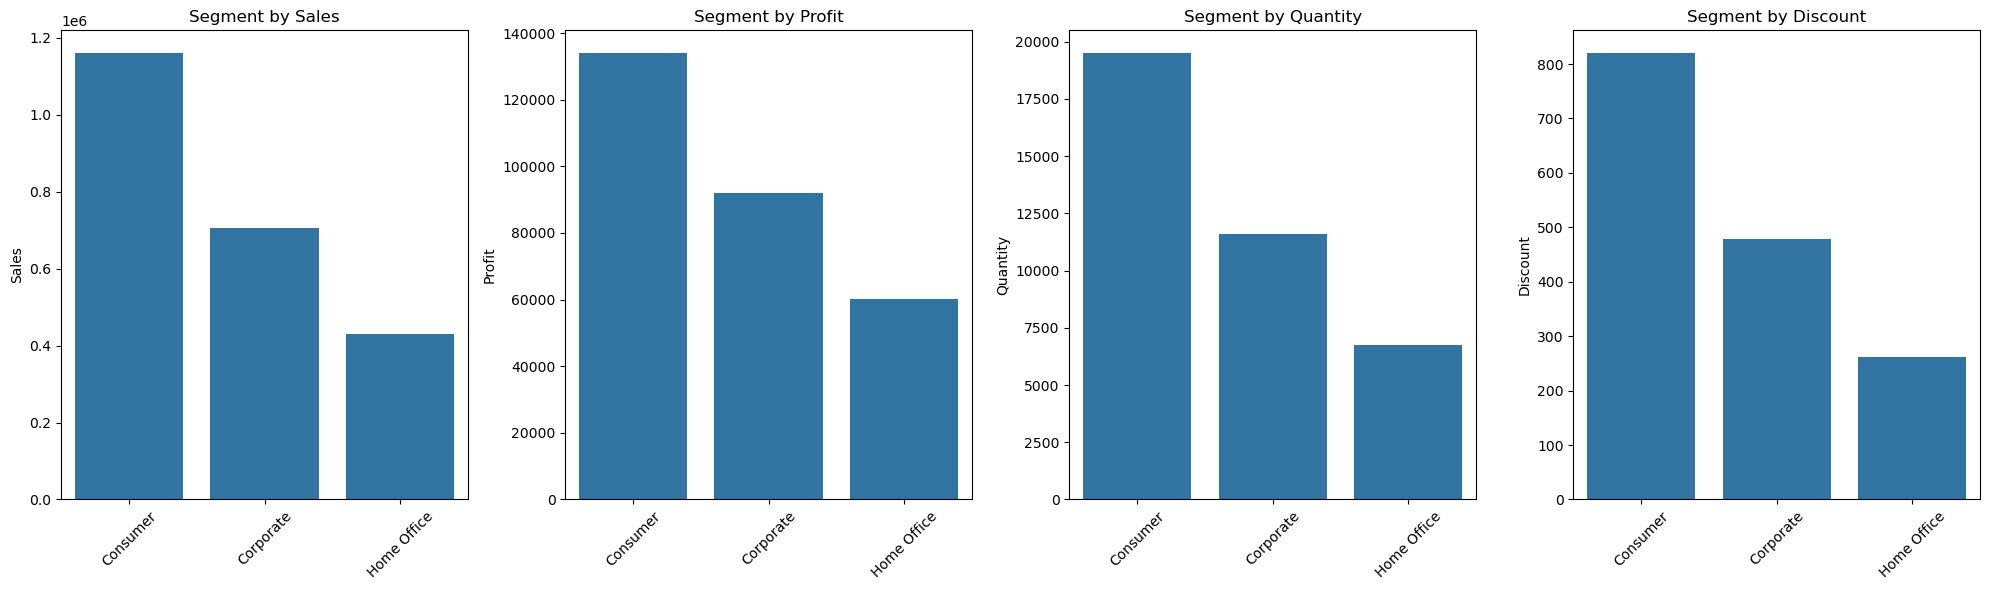

In [33]:
metrics = ['Sales', 'Profit', 'Quantity', 'Discount']
plt.figure(figsize=(20, 6))  
for k, metric in enumerate(metrics):
    plt.subplot(1, 4, k + 1)
    df_top_10 = df.groupby('Segment')[metric].sum().nlargest().reset_index()
    sns.barplot(data=df_top_10, x='Segment', y=metric)
    plt.title(f'Segment by {metric}')
    plt.xlabel('') 
    plt.ylabel(metric)  
    plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

###### `City` vs [ `Sales` , `Profit`, `Quantity` , `Discount` ]


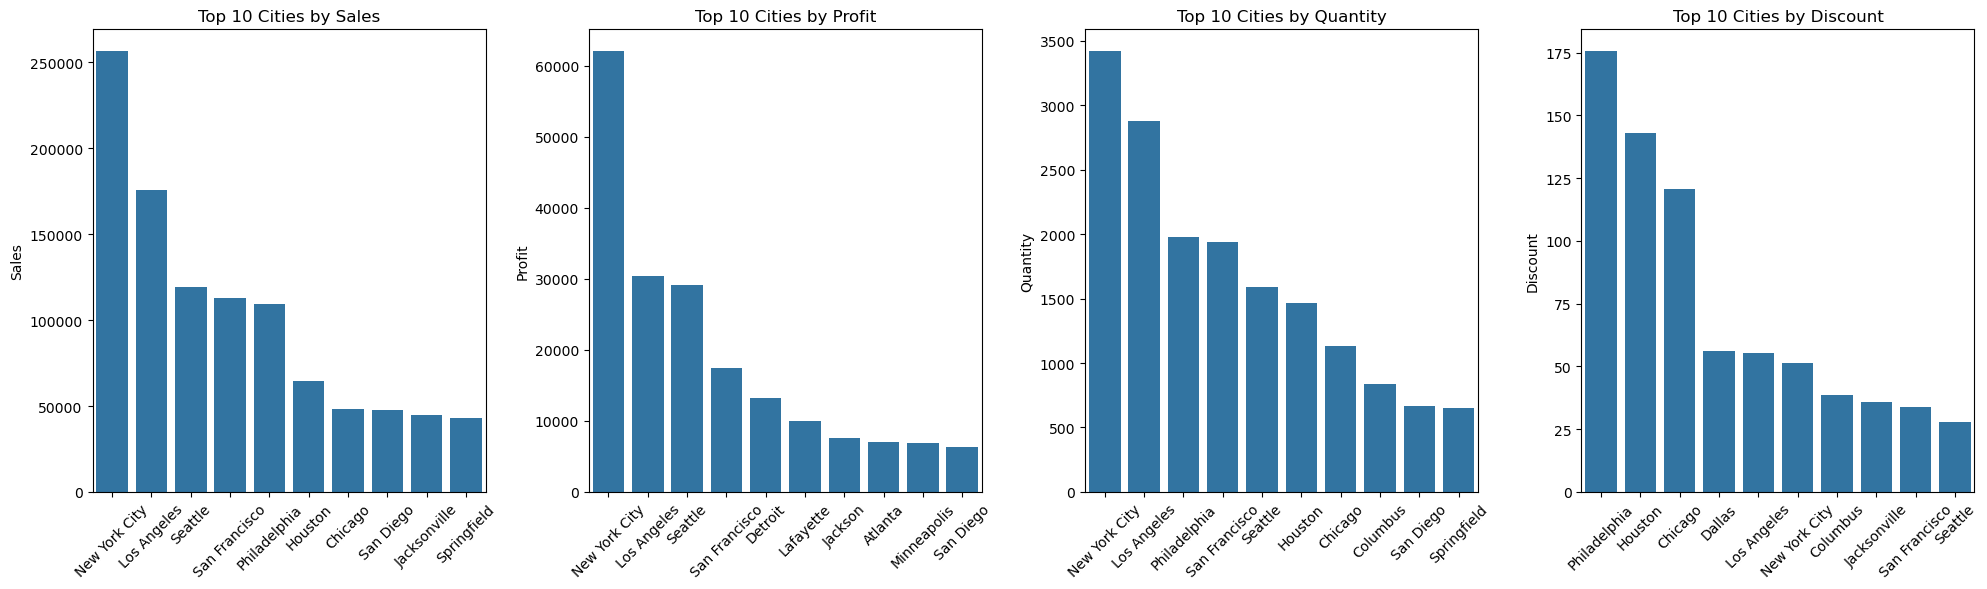

In [34]:
metrics = ['Sales', 'Profit', 'Quantity', 'Discount']
plt.figure(figsize=(20, 6))  
for k, metric in enumerate(metrics):
    plt.subplot(1, 4, k + 1)
    df_top_10 = df.groupby('City')[metric].sum().nlargest(10).reset_index()
    sns.barplot(data=df_top_10, x='City', y=metric)
    plt.title(f'Top 10 Cities by {metric}')
    plt.xlabel('') 
    plt.ylabel(metric)  
    plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

###### `State` vs [ `Sales` , `Profit`, `Quantity` , `Discount` ]

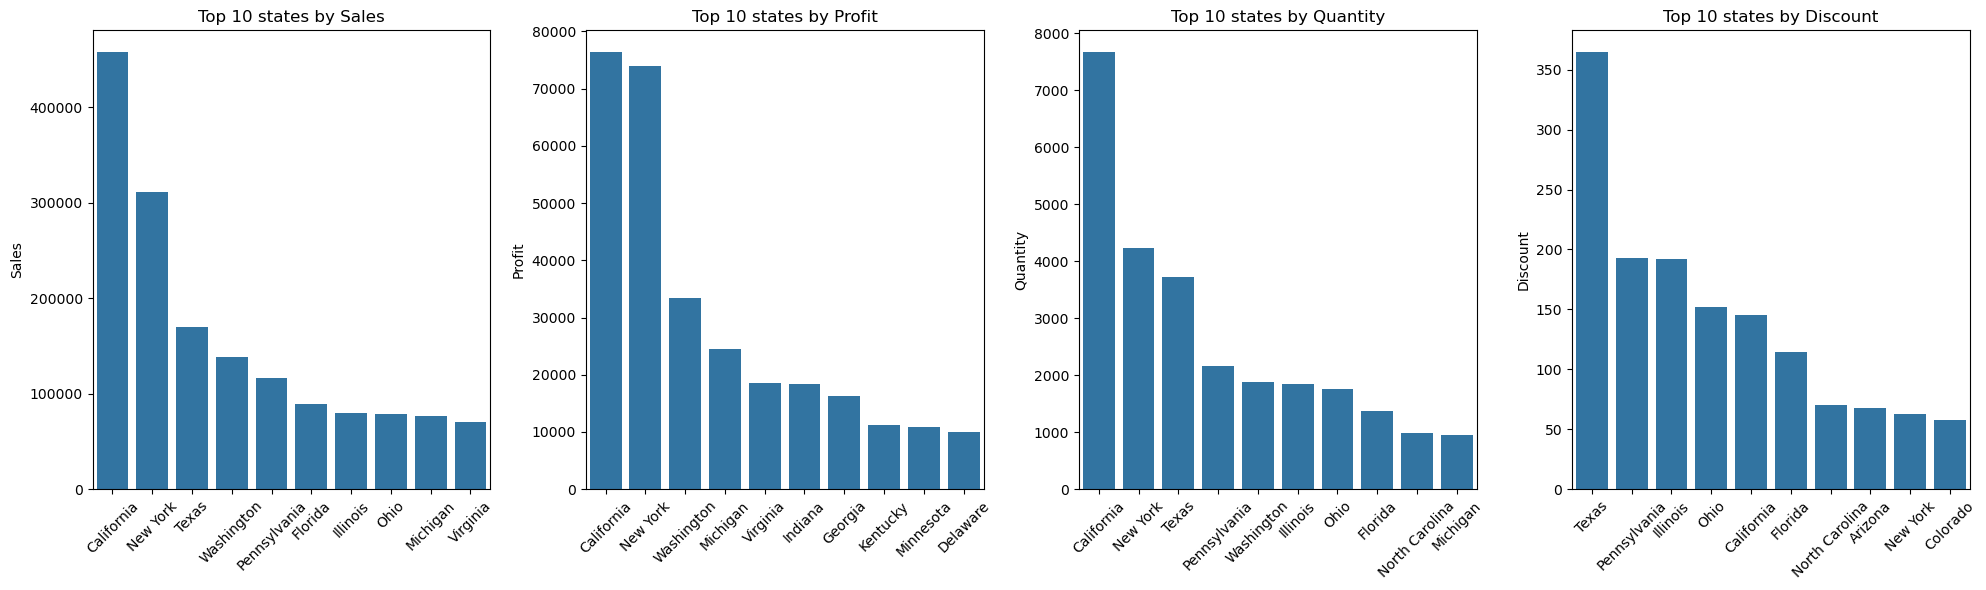

In [35]:
metrics = ['Sales', 'Profit', 'Quantity', 'Discount']
plt.figure(figsize=(20, 6))  
for k, metric in enumerate(metrics):
    plt.subplot(1, 4, k + 1)
    df_top_10 = df.groupby('State')[metric].sum().nlargest(10).reset_index()
    sns.barplot(data=df_top_10, x='State', y=metric)
    plt.title(f'Top 10 states by {metric}')
    plt.xlabel('') 
    plt.ylabel(metric)  
    plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

###### `Region` vs [ `Sales` , `Profit`, `Quantity` , `Discount` ]


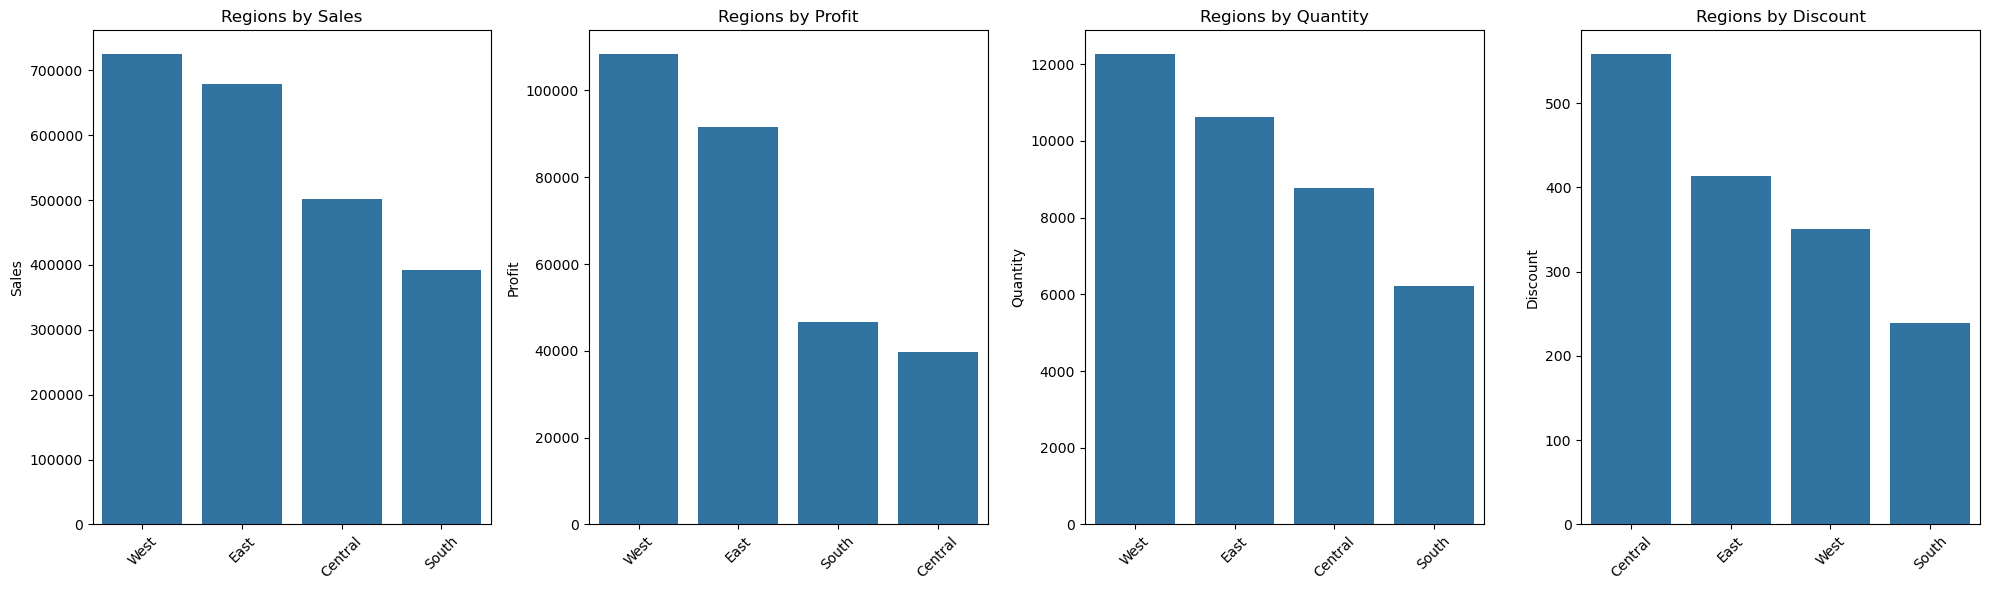

In [36]:
metrics = ['Sales', 'Profit', 'Quantity', 'Discount']
plt.figure(figsize=(20, 6))  
for k, metric in enumerate(metrics):
    plt.subplot(1, 4, k + 1)
    df_top_10 = df.groupby('Region')[metric].sum().nlargest().reset_index()
    sns.barplot(data=df_top_10, x='Region', y=metric)
    plt.title(f'Regions by {metric}')
    plt.xlabel('') 
    plt.ylabel(metric)  
    plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


###### `Category` vs [ `Sales` , `Profit`, `Quantity` , `Discount` ]


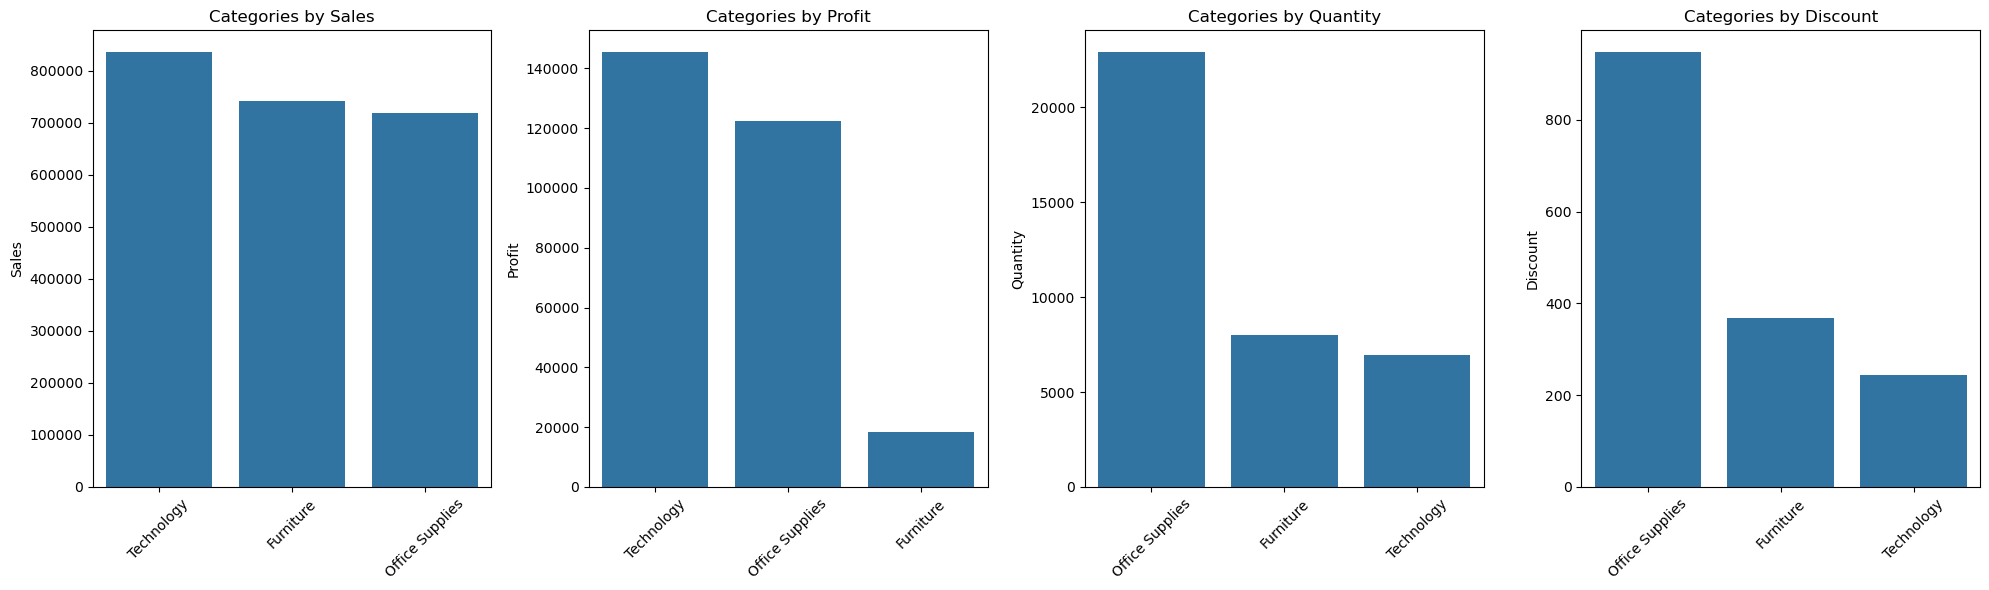

In [37]:
metrics = ['Sales', 'Profit', 'Quantity', 'Discount']
plt.figure(figsize=(20, 6))  
for k, metric in enumerate(metrics):
    plt.subplot(1, 4, k + 1)
    df_top_10 = df.groupby('Category')[metric].sum().nlargest().reset_index()
    sns.barplot(data=df_top_10, x='Category', y=metric)
    plt.title(f'Categories by {metric}')
    plt.xlabel('') 
    plt.ylabel(metric)  
    plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


###### `Sub-Category` vs [ `Sales` , `Profit`, `Quantity` , `Discount` ]


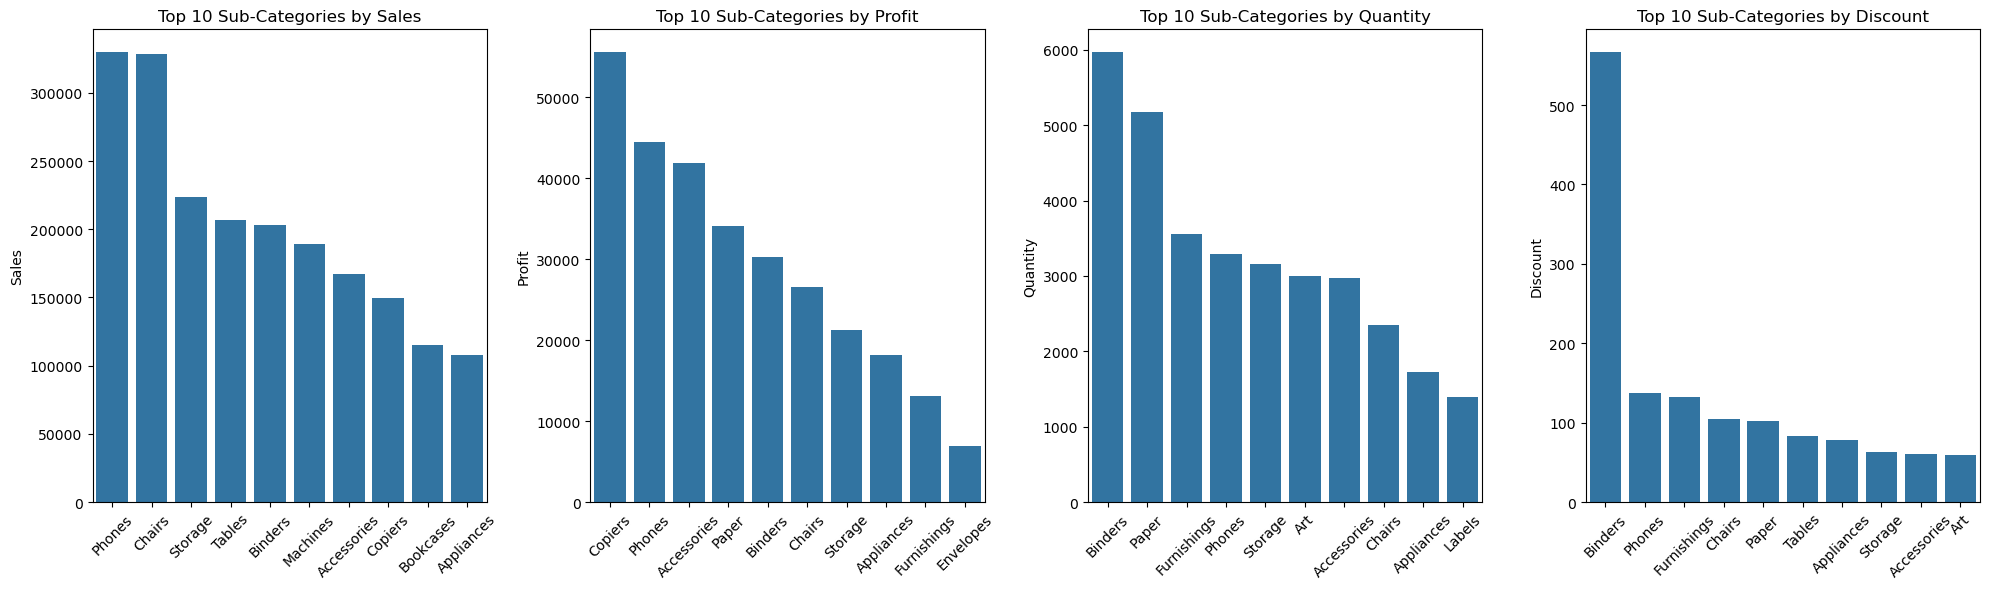

In [38]:
metrics = ['Sales', 'Profit', 'Quantity', 'Discount']
plt.figure(figsize=(20, 6))  
for k, metric in enumerate(metrics):
    plt.subplot(1, 4, k + 1)
    df_top_10 = df.groupby('Sub-Category')[metric].sum().nlargest(10).reset_index()
    sns.barplot(data=df_top_10, x='Sub-Category', y=metric)
    plt.title(f'Top 10 Sub-Categories by {metric}')
    plt.xlabel('') 
    plt.ylabel(metric)  
    plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


###### `Product Name` vs  [ `Sales` , `Profit`, `Quantity` , `Discount` ]

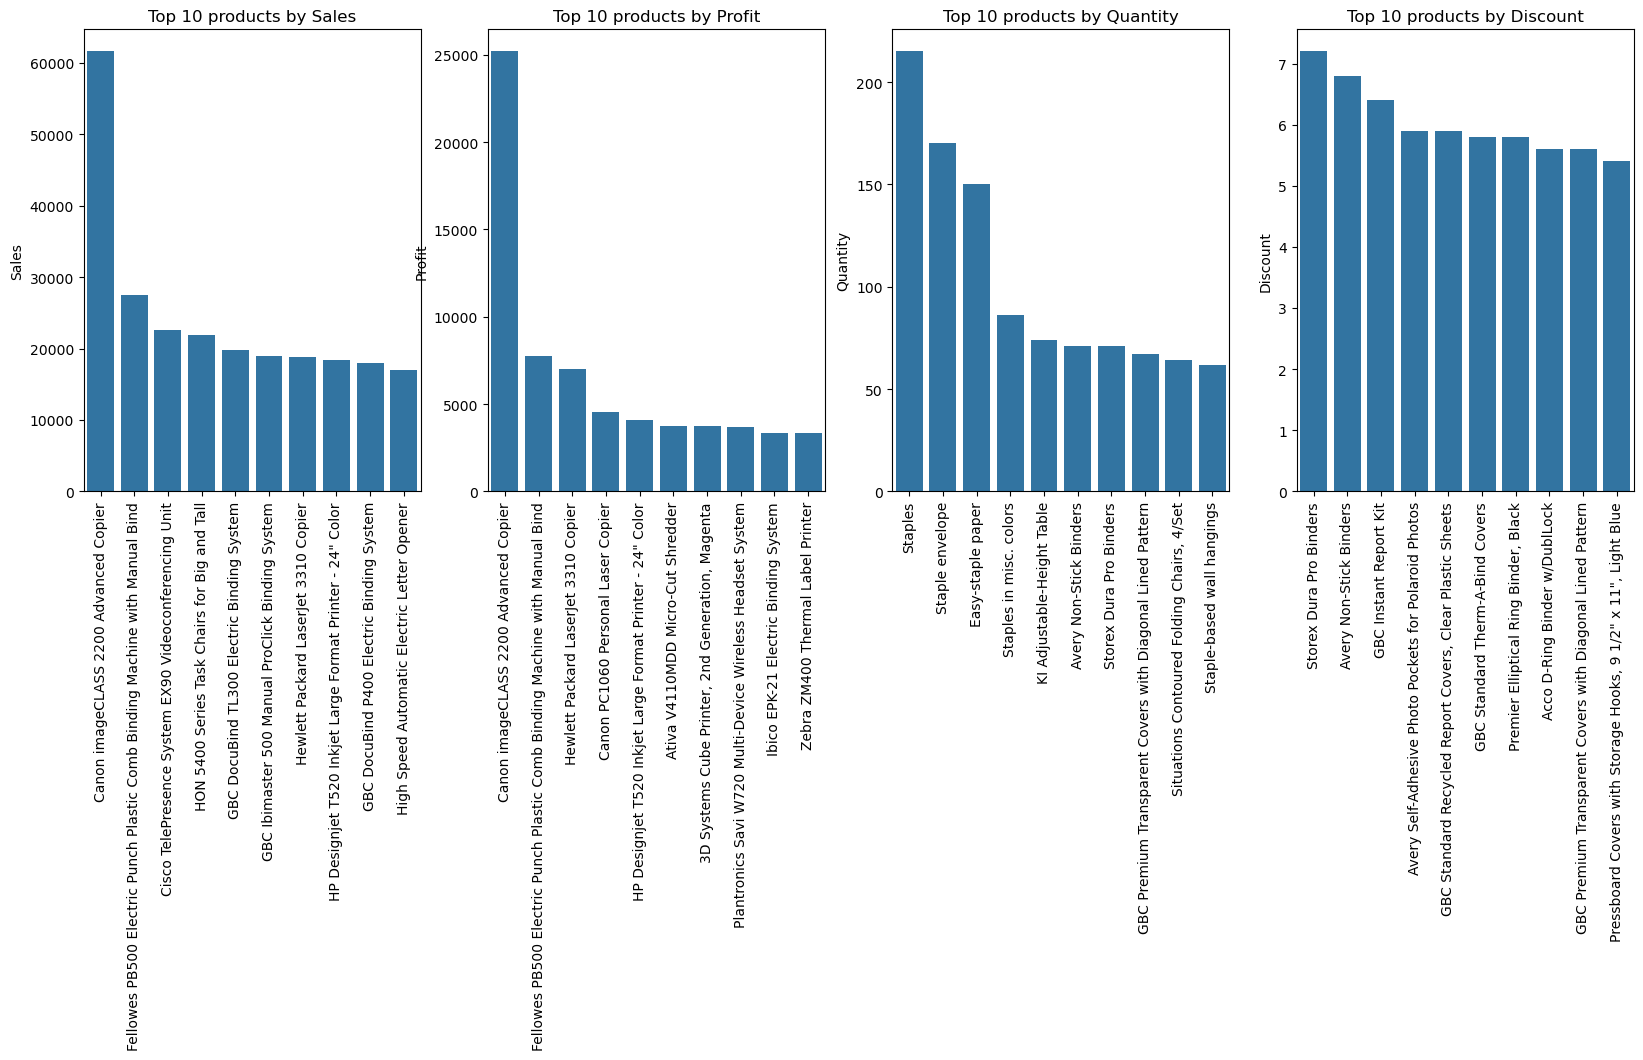

In [39]:
metrics = ['Sales', 'Profit', 'Quantity', 'Discount']
plt.figure(figsize=(20, 6))  
for k, metric in enumerate(metrics):
    plt.subplot(1, 4, k + 1)
    df_top_10 = df.groupby('Product Name')[metric].sum().nlargest(10).reset_index()
    sns.barplot(data=df_top_10, x='Product Name', y=metric)
    plt.title(f'Top 10 products by {metric}')
    plt.xlabel('') 
    plt.ylabel(metric)  
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

`Sales` and `Profit`  by  `Segment` and  `Category`


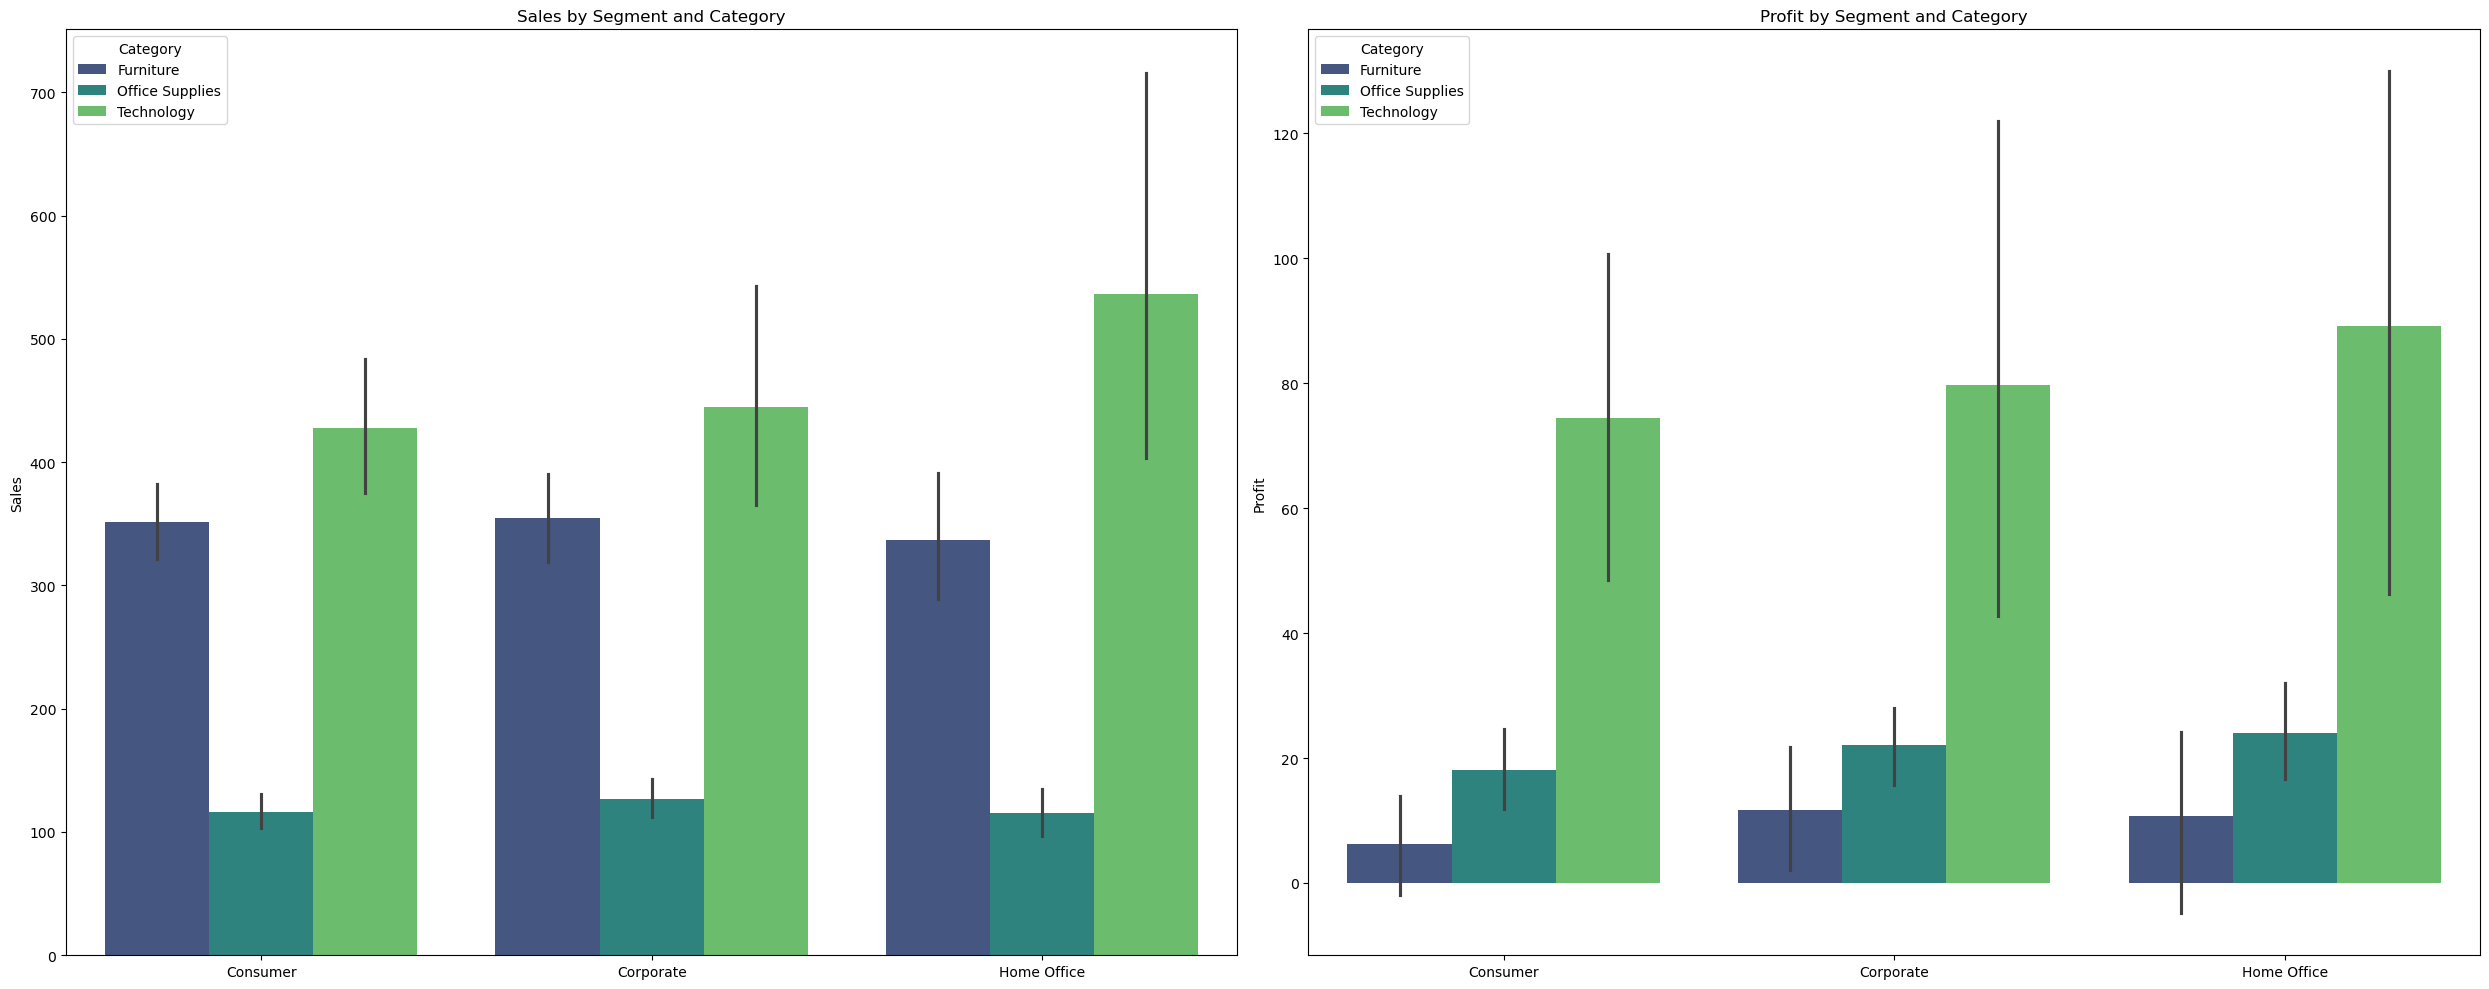

In [40]:

plt.figure(figsize=(25,10))

plt.subplot(121)


ax = sns.barplot(data=df, x='Segment', hue='Category', y='Sales', palette="viridis")
plt.title('Sales by Segment and Category')
plt.xlabel('')
plt.ylabel('Sales')

plt.subplot(122)
ax = sns.barplot(data=df, x='Segment', hue='Category', y='Profit', palette="viridis")
plt.title('Profit by Segment and Category')
plt.xlabel('')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

`Sales` and `Profit` by  `Segment` and  `Sub-Category`


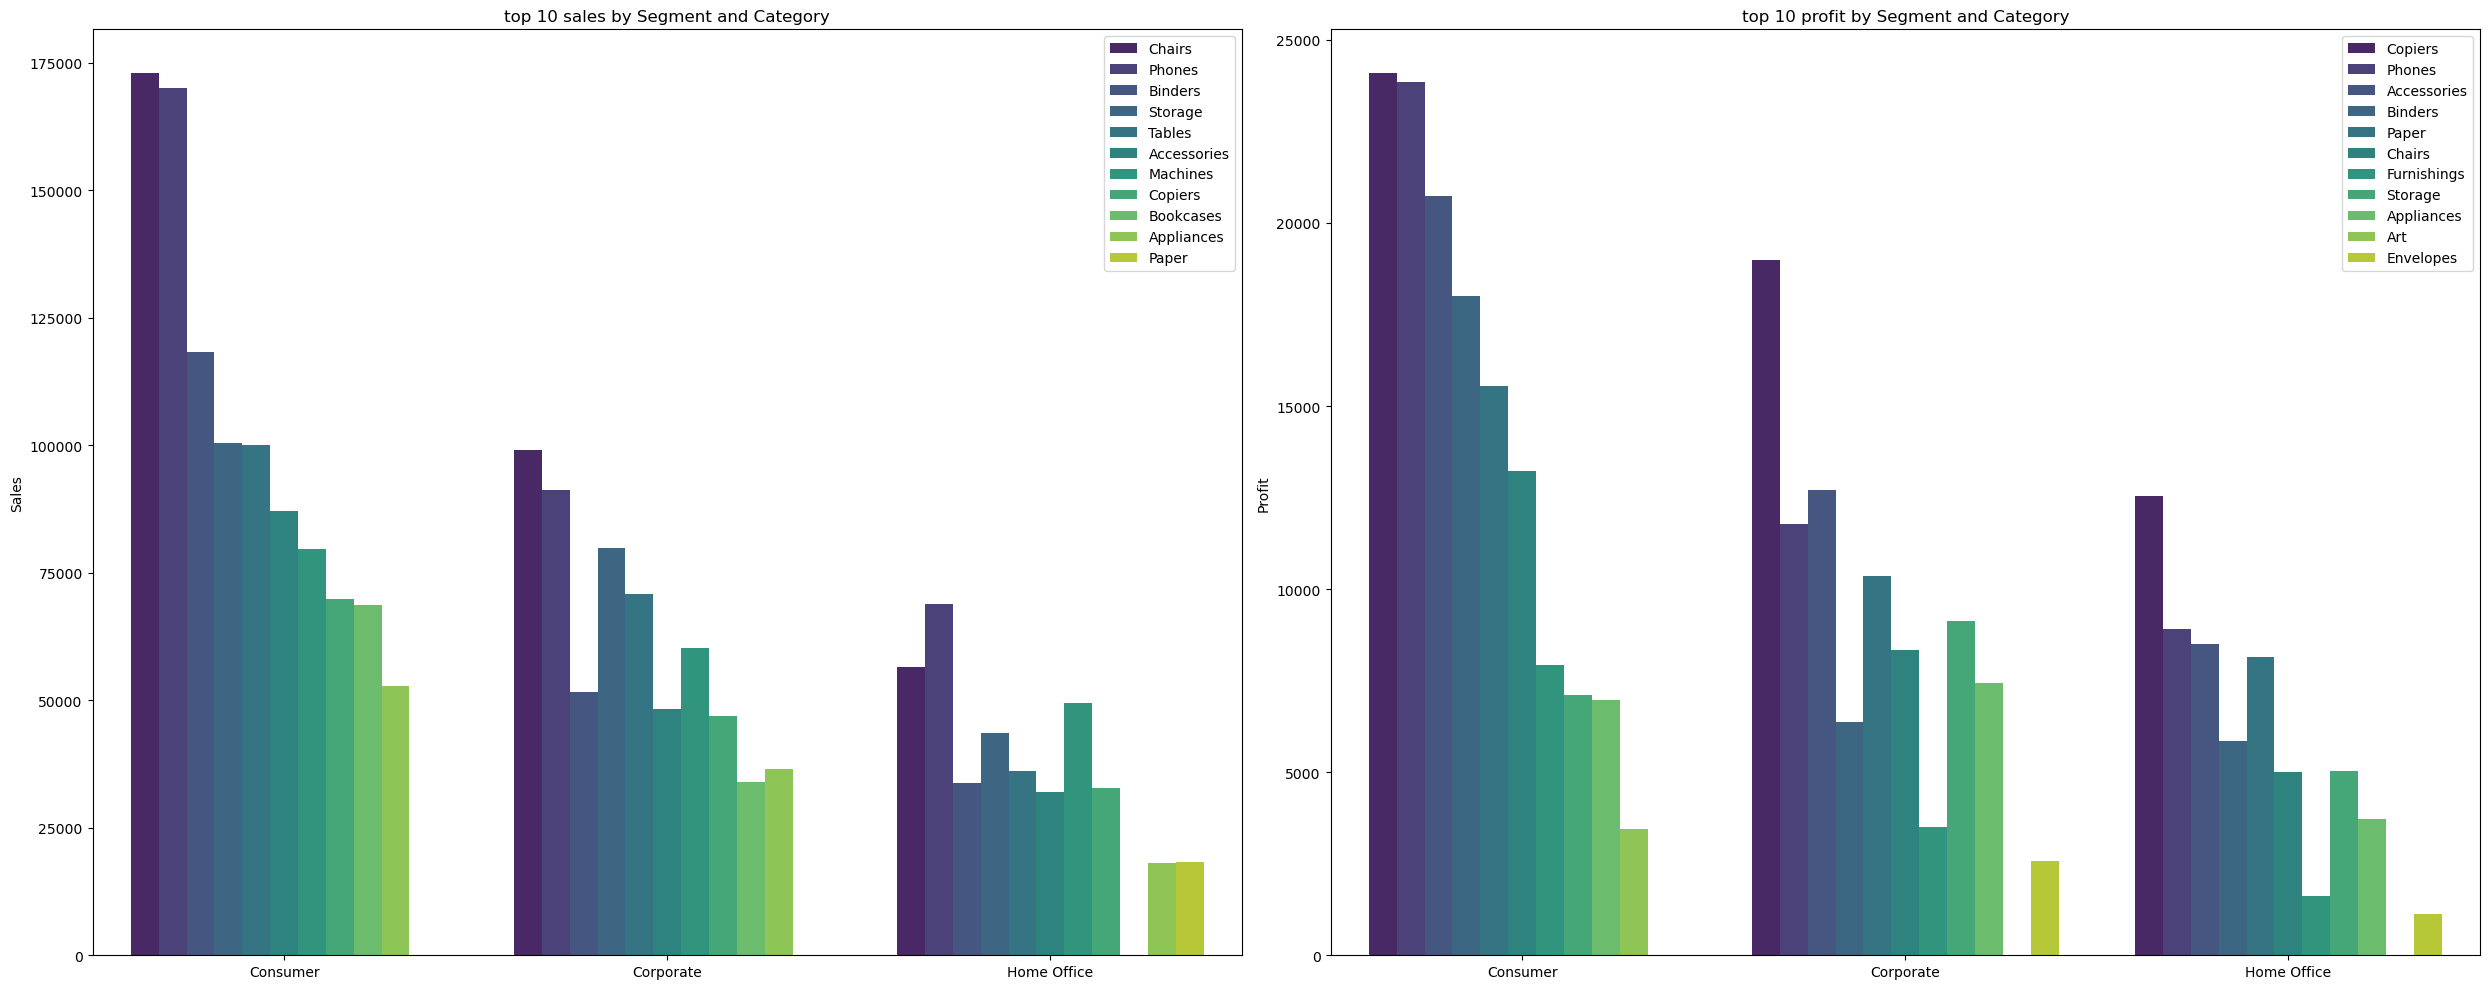

In [41]:

df_grouped = df.groupby(['Segment', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()

def get_top_10(df, metric):
    return df.groupby('Segment').apply(lambda x: x.nlargest(10, metric)).reset_index(drop=True)

top_10_sales_per_segment = get_top_10(df_grouped, 'Sales')

top_10_profit_per_segment = get_top_10(df_grouped, 'Profit')



plt.figure(figsize=(25,10))

plt.subplot(121)
ax = sns.barplot(data=top_10_sales_per_segment, x='Segment', hue='Sub-Category', y='Sales', palette="viridis")
plt.title('top 10 sales by Segment and Category')
plt.xlabel('')
plt.ylabel('Sales')
plt.legend(loc='upper right')


plt.subplot(122)
ax = sns.barplot(data=top_10_profit_per_segment, x='Segment', hue='Sub-Category', y='Profit', palette="viridis")
plt.title('top 10 profit by Segment and Category')
plt.xlabel('')
plt.ylabel('Profit')
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()


`Sales` and `Profit` by  `Region` and  `Segment`


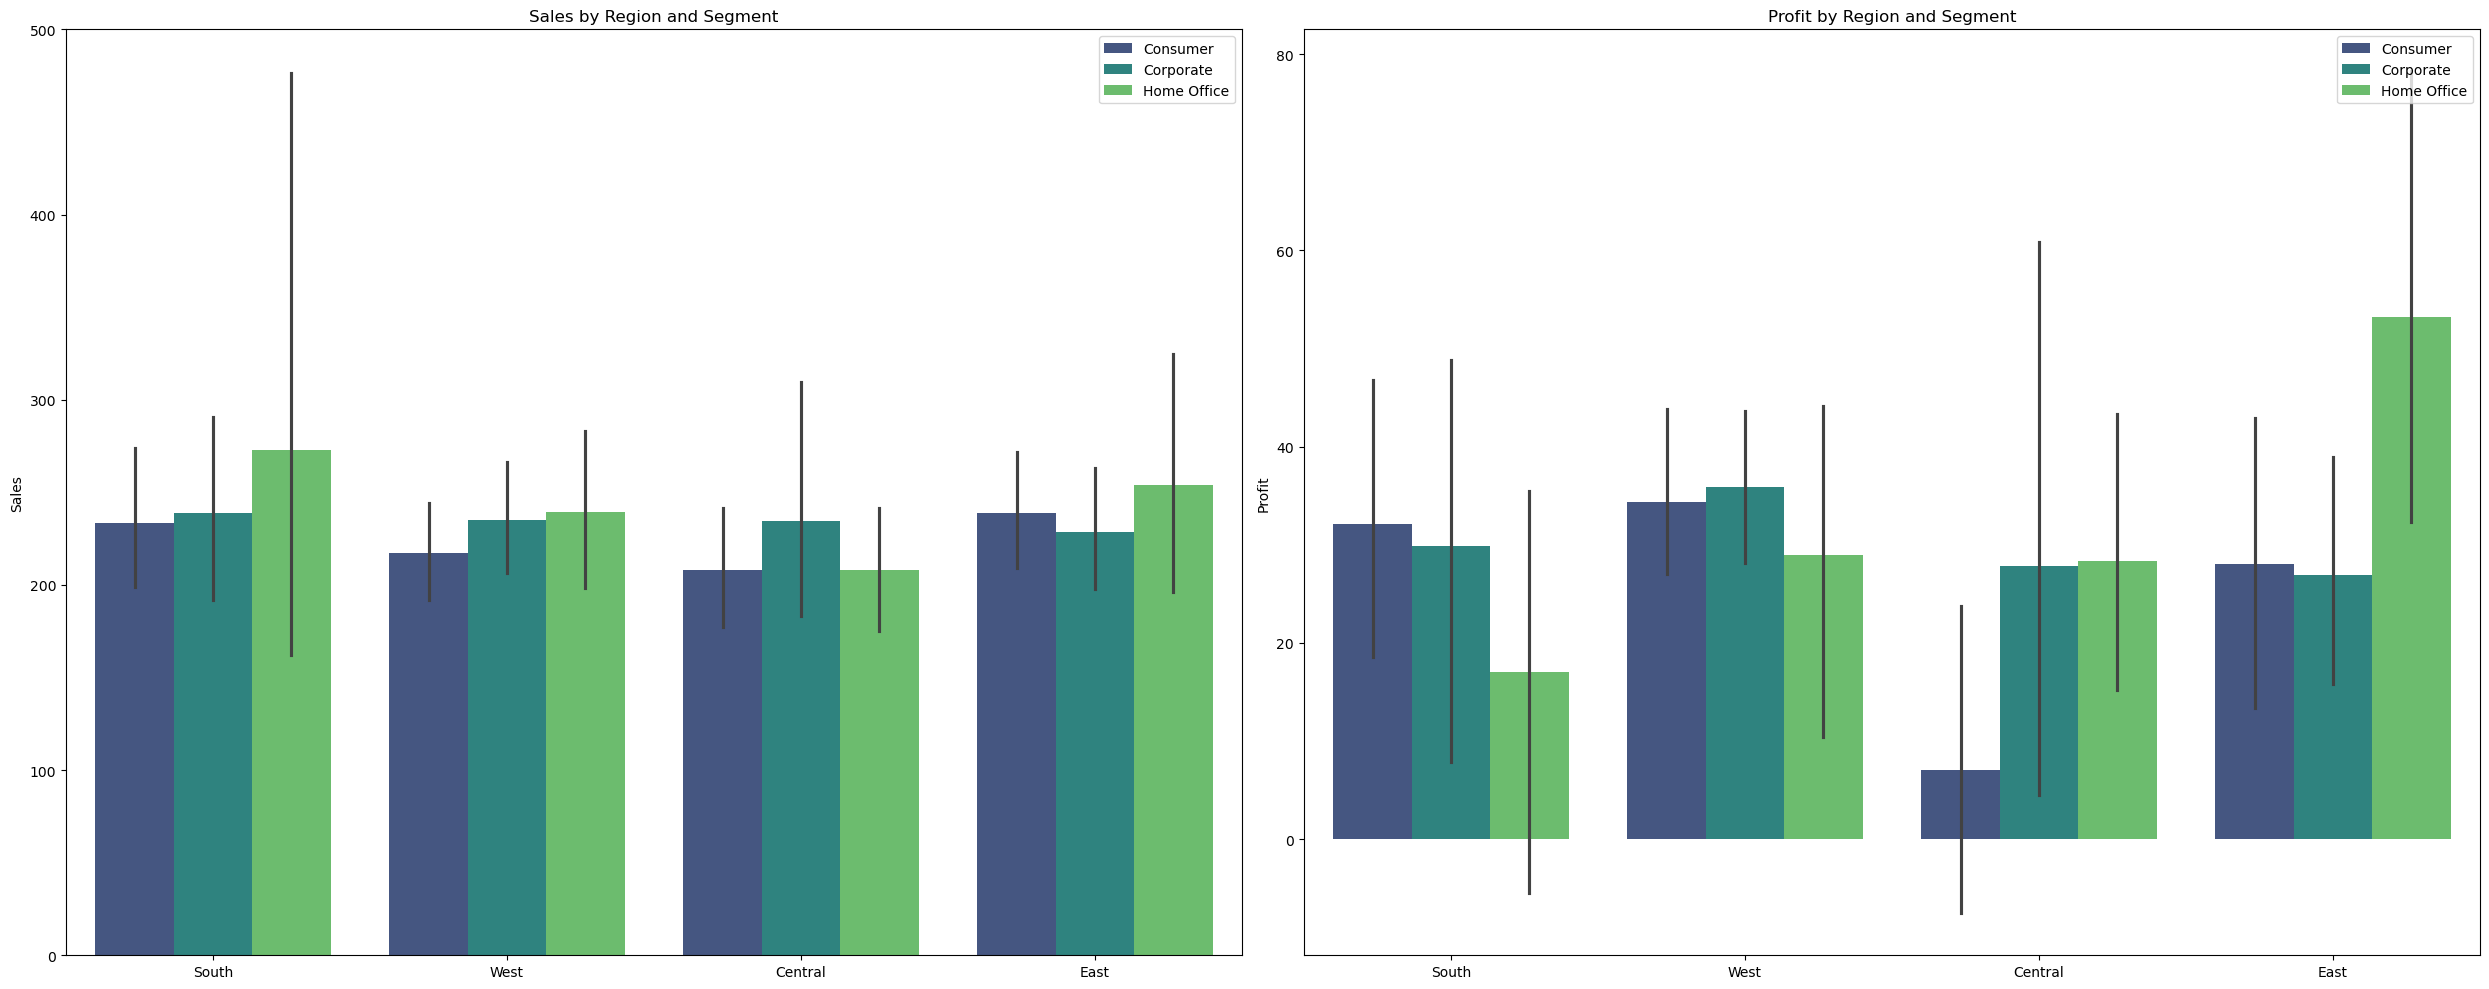

In [42]:

plt.figure(figsize=(25,10))

plt.subplot(121)


ax = sns.barplot(data=df, x='Region', hue='Segment', y='Sales', palette="viridis")
plt.title('Sales by Region and Segment')
plt.xlabel('')
plt.ylabel('Sales')
plt.legend(loc='upper right')

plt.subplot(122)
ax = sns.barplot(data=df, x='Region', hue='Segment', y='Profit', palette="viridis")
plt.title('Profit by Region and Segment')
plt.xlabel('')
plt.ylabel('Profit')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


`Sales` and `Profit` by  `Region` and  `Category`


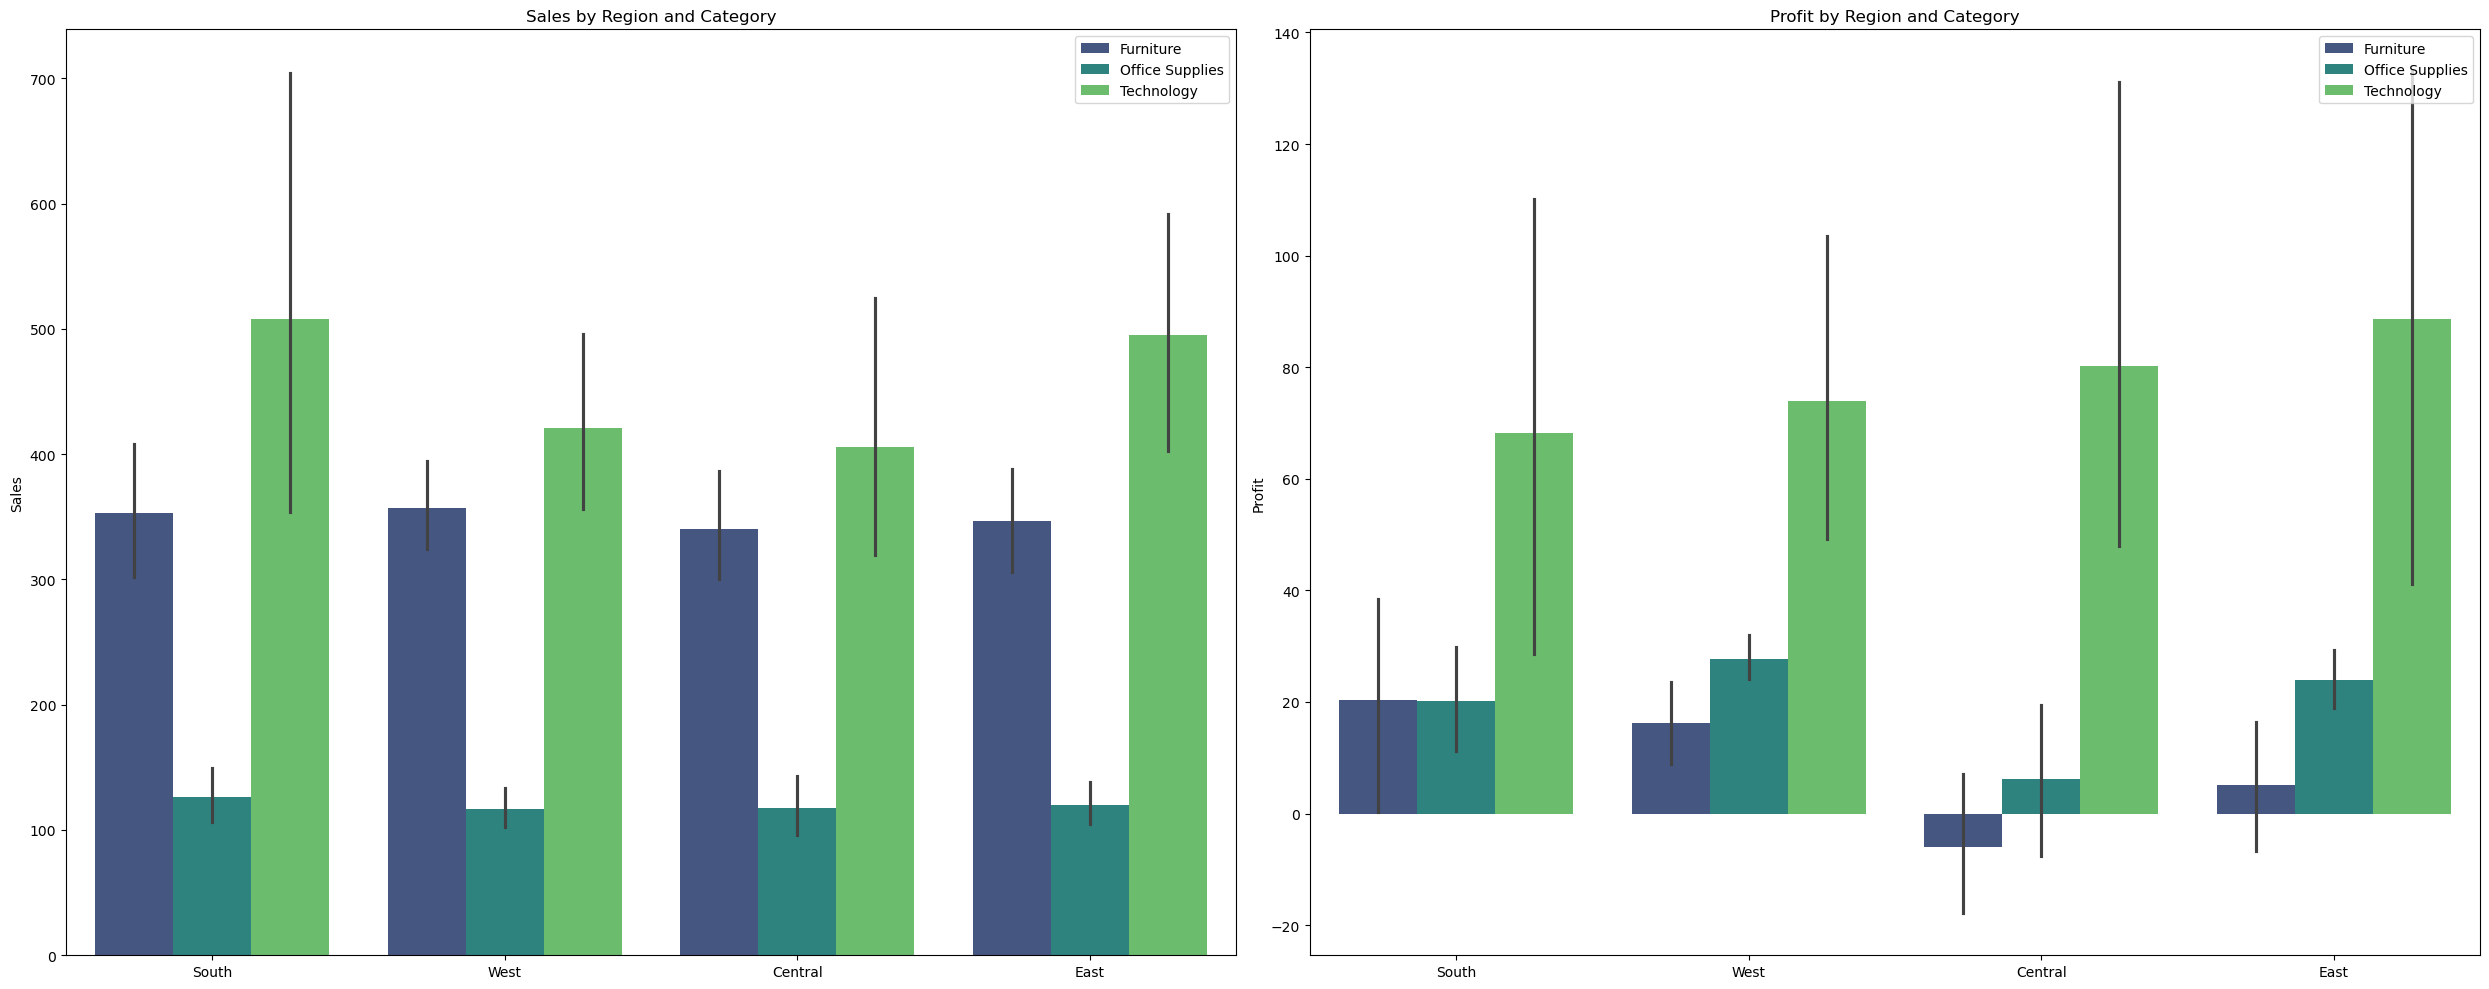

In [43]:

plt.figure(figsize=(25,10))

plt.subplot(121)


ax = sns.barplot(data=df, x='Region', hue='Category', y='Sales', palette="viridis")
plt.title('Sales by Region and Category')
plt.xlabel('')
plt.ylabel('Sales')
plt.legend(loc='upper right')

plt.subplot(122)
ax = sns.barplot(data=df, x='Region', hue='Category', y='Profit', palette="viridis")
plt.title('Profit by Region and Category')
plt.xlabel('')
plt.ylabel('Profit')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


##### 3. Categorical VS Categorical

`Ship Mode` VS `Segment`

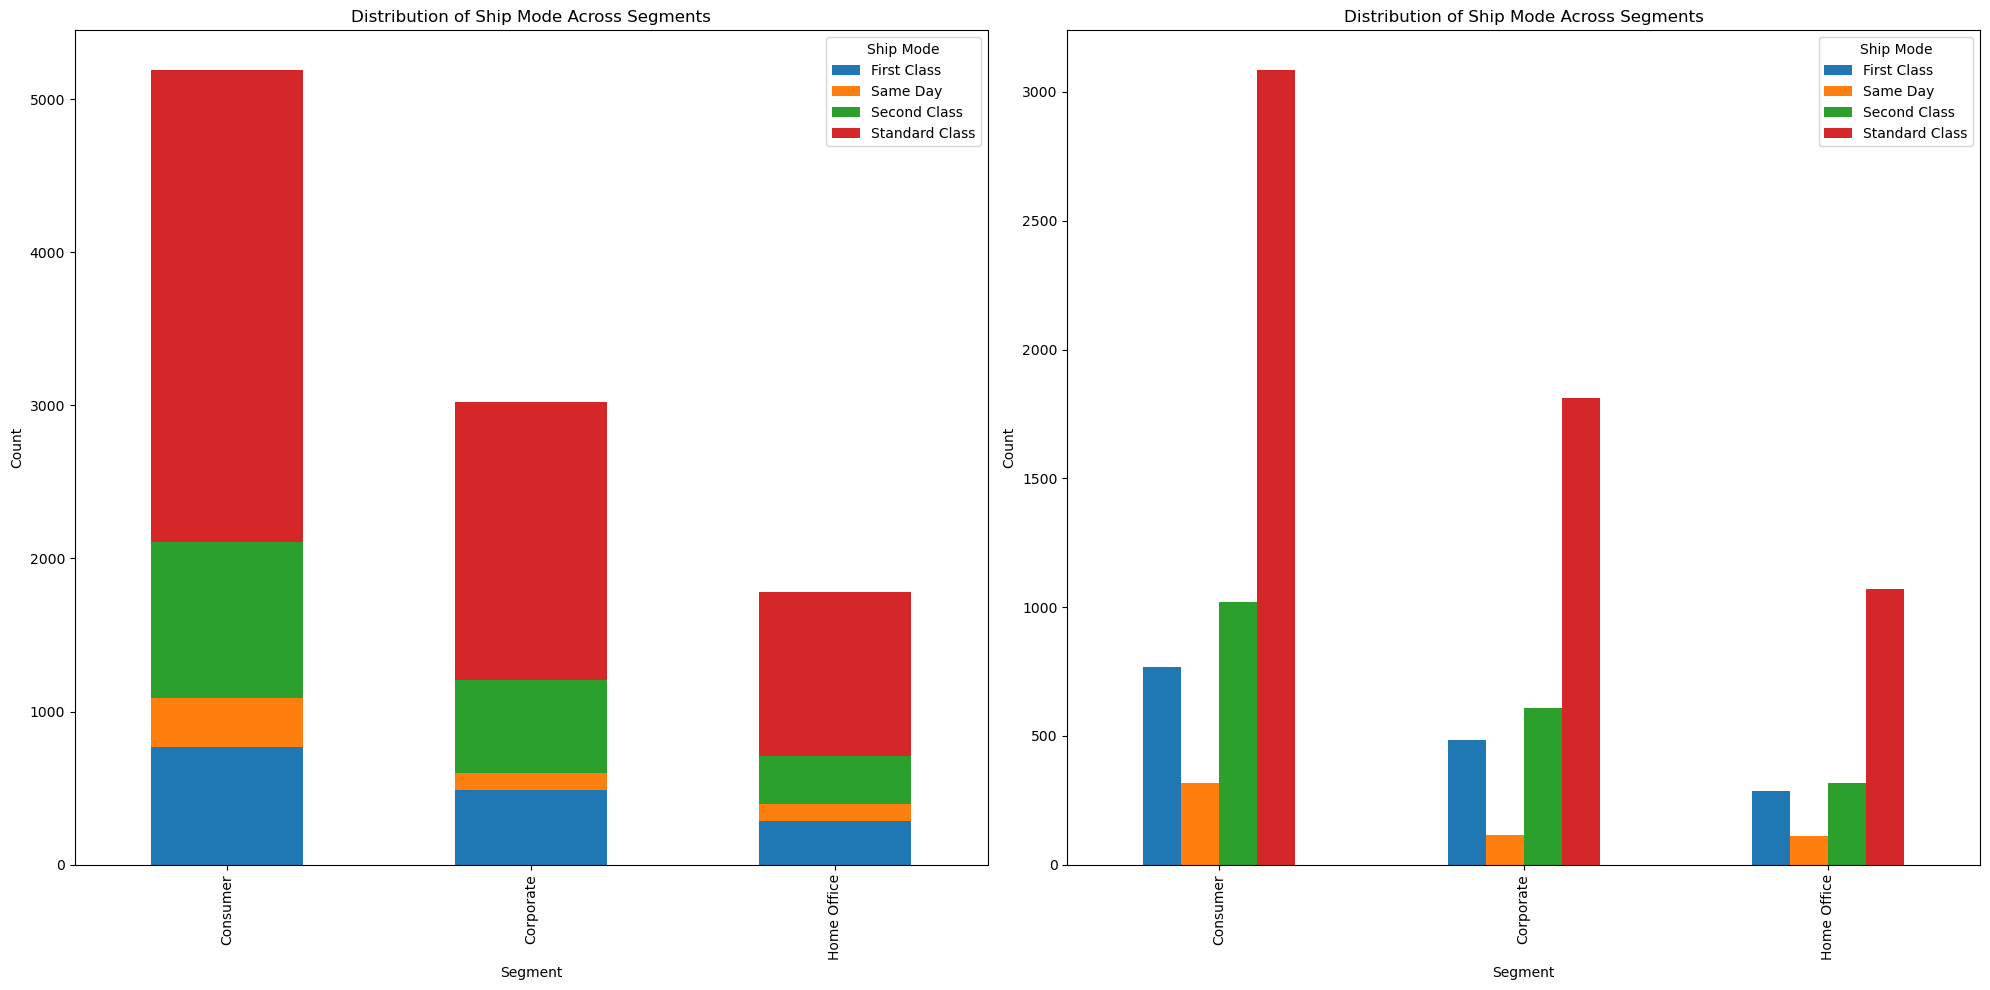

In [44]:
aggregated_df=df.groupby(['Segment','Ship Mode']).size().unstack()


plt.figure(figsize=(20, 10))
plt.subplot(121)
aggregated_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of Ship Mode Across Segments')
plt.xlabel('Segment')
plt.ylabel('Count')


plt.subplot(122)
aggregated_df.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Distribution of Ship Mode Across Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.legend(title='Ship Mode')


plt.tight_layout()
plt.show()

`Ship Mode` VS `Region`

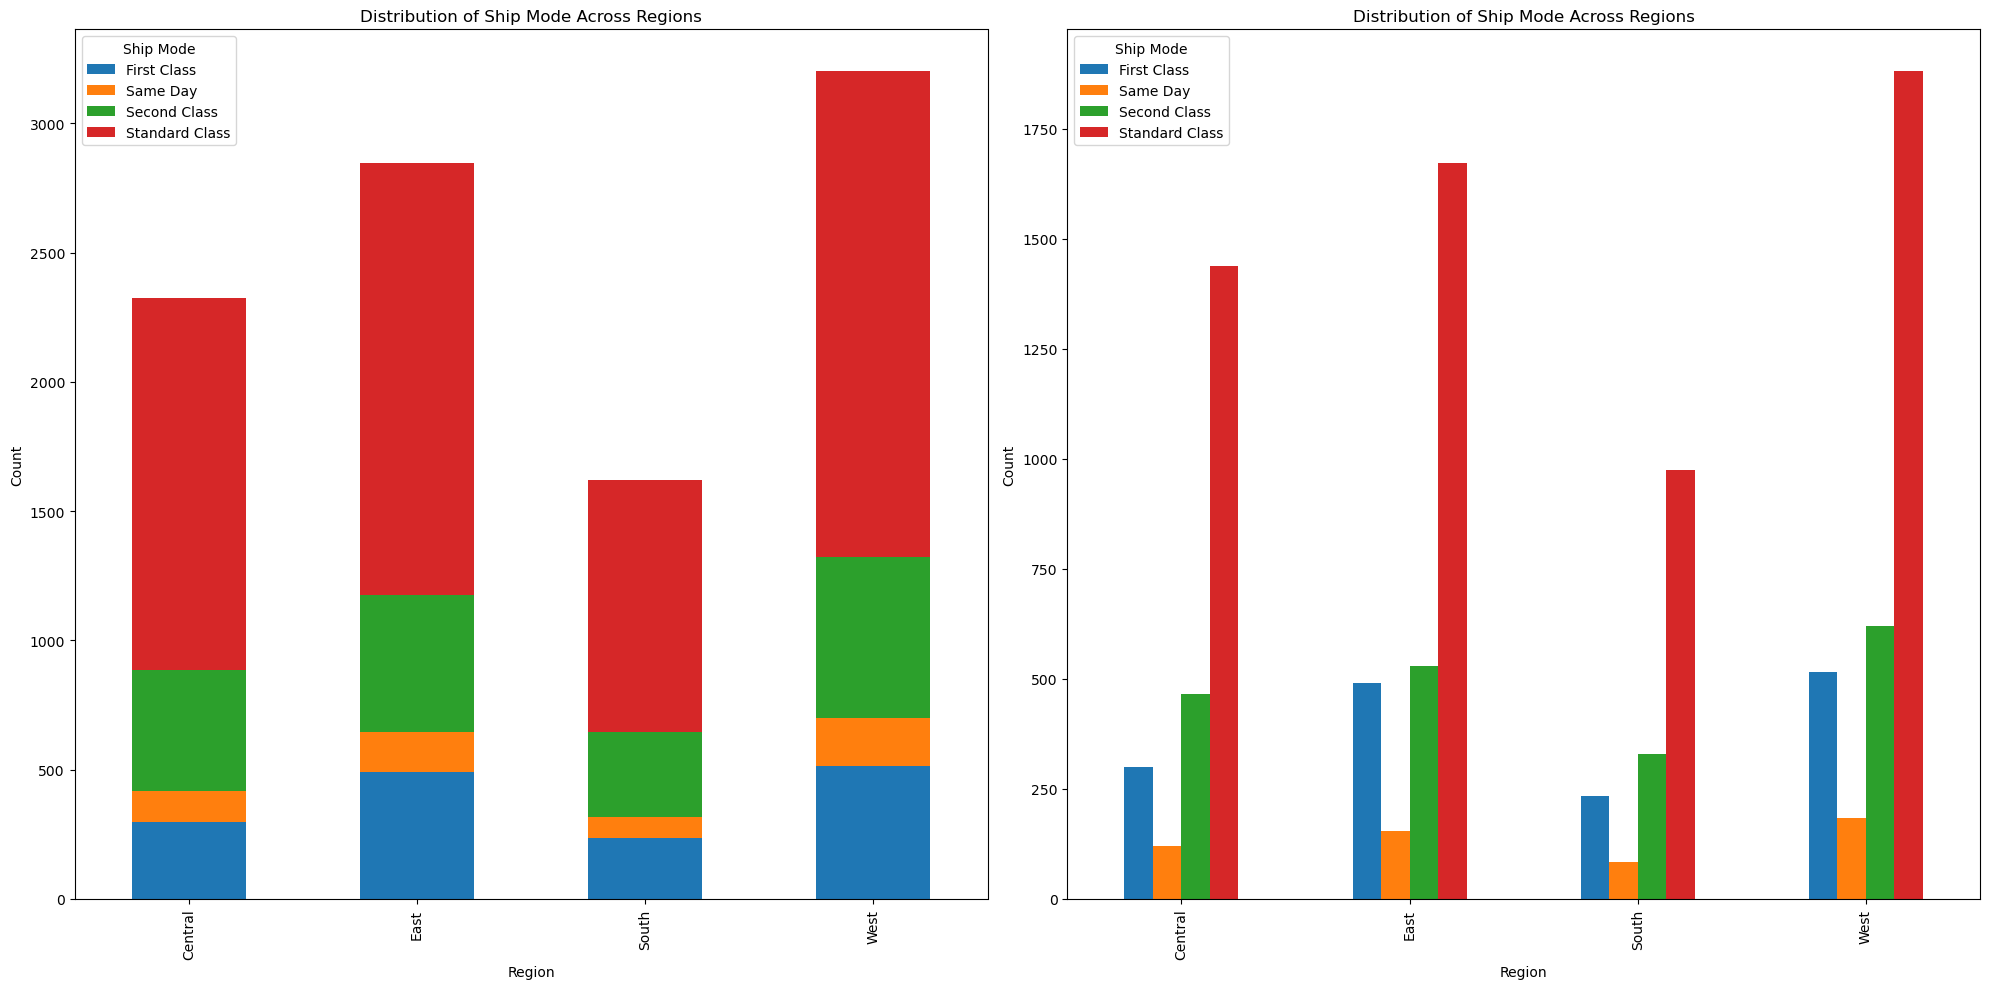

In [45]:
aggregated_df=df.groupby(['Region','Ship Mode']).size().unstack()


plt.figure(figsize=(20, 10))
plt.subplot(121)
aggregated_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of Ship Mode Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')


plt.subplot(122)
aggregated_df.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Distribution of Ship Mode Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Ship Mode')


plt.tight_layout()
plt.show()

# Step 5 :  Conclusion and Insights<a id='step5'></a>

## Sales Analysis
1. **Which segment generates the highest sales?**
   - The *Consumer* segment generates the highest sales.

2. **Which cities provide the highest total discounts?**
   - *New York City* provides the highest total discounts.

3. **Which regions generate the highest sales?**
   - The *West* region generates the highest sales.

4. **Which product categories generate the highest sales?**
   - The *Technology* category generates the highest sales.

5. **Which sub-categories generate the highest sales?**
   - *Phones* generate the highest sales among sub-categories.

6. **Which states provide the highest sales?**
   - *California* provides the highest sales.

---

## Profit Analysis
1. **Which segment generates the highest profit?**
   - The *Consumer* segment generates the highest profit.

2. **Which cities generate the highest profit?**
   - *New York City* generates the highest profit.

3. **Which regions generate the highest profit?**
   - The *West* region generates the highest profit.

4. **Which product categories generate the highest profit?**
   - The *Technology* category generates the highest profit.

5. **Which sub-categories generate the highest profit?**
   - *Phones* generate the highest profit among sub-categories.

6. **Which states provide the highest profit?**
   - *California* provides the highest profit.

---

## Quantity Analysis
1. **Which segment generates the highest quantity sold?**
   - The *Consumer* segment has the highest quantity sold.

2. **Which cities generate the highest quantity sold?**
   - *New York City* generates the highest quantity sold.

3. **Which regions generate the highest quantity sold?**
   - The *West* region generates the highest quantity sold.

4. **Which product categories generate the highest quantity sold?**
   - The *Office Supplies* category generates the highest quantity sold.

5. **Which sub-categories generate the highest quantity sold?**
   - *Binders* generate the highest quantity sold.

6. **Which states generate the highest quantity sold?**
   - *California* generates the highest quantity sold.

---

## Discount Analysis
1. **Which segment offers the highest discounts?**
   - The *Home Office* segment offers the highest discounts.

2. **Which cities provide the highest total discounts?**
   - *New York City* provides the highest total discounts.

3. **Which regions provide the highest total discounts?**
   - The *West* region provides the highest total discounts.

4. **Which product categories offer the highest discounts?**
   - The *Furniture* category offers the highest discounts.

5. **Which sub-categories offer the highest discounts?**
   - *Tables* offer the highest discounts.

6. **Which states provide the highest total discounts?**
   - *California* provides the highest total discounts.

---
## Shipping Mode Analysis
1. **What is the distribution of shipping modes across segments?**
   - Across all segments, the *Standard Class* shipping mode is the most preferred.
2. **What is the distribution of shipping modes across regions?**
   - The *Standard Class* shipping mode is the most commonly used in all regions.
